In [1]:
import pandas as pd
import numpy as np
import math as m
#from datetime import datetime
from datetime import date, datetime, timedelta
import csv
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [4]:
import scipy

In [46]:
df = pd.read_csv('RS_newFile2.txt')  

In [3]:
pd.read_csv('RS_newFile2.txt')  

,Date Time RS_Avg doy height SZA RS
0,yyyy-mm-dd hh:mm:ss W/m2 doy deg deg W/m2
1,1 2009-01-01 00:00:00 0.00 1 -70.53 160.53 NA
2,2 2009-01-01 00:10:00 0.00 1 -70.35 160.35 NA
3,3 2009-01-01 00:20:00 0.00 1 -69.96 159.96 NA
4,4 2009-01-01 00:30:00 0.00 1 -69.37 159.37 NA
...,...
730243,730243 2022-12-31 23:10:00 0.00 365 -68.27 158...
730244,730244 2022-12-31 23:20:00 0.00 365 -69.11 159...
730245,730245 2022-12-31 23:30:00 0.00 365 -69.78 159...
730246,730246 2022-12-31 23:40:00 0.00 365 -70.25 160...


In [19]:
print(df.columns.tolist())

['Date Time RS_Avg doy height SZA RS']


In [22]:
df = pd.read_csv('RS_newFile.txt')


In [23]:
print(df.columns.tolist())

['Date Time doy height SZA RS']


In [24]:
df = pd.read_csv('PER10min2009_2022_RS_H.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_14016\818730342.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PER10min2009_2022_RS_H.csv')


In [25]:
print(df.columns.tolist())

['TIMESTAMP', 'RS_Std', 'HumR1min_Avg', 'RS_Avg']


In [26]:
df = pd.read_csv('output_file.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_14016\3866723669.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output_file.csv')


In [27]:
print(df.columns.tolist())

['index', 'TIMESTAMP', 'RS_Std', 'HumR1min_Avg', 'RS_Avg', 'zenith_angle_deg']


In [ ]:
# Afegim doy i hour

In [34]:
df['TIMESTAMP'].dayofyear

AttributeError: 'Series' object has no attribute 'dayofyear'

In [39]:
df['TIMESTAMP']  = pd.to_datetime(df['TIMESTAMP'])

In [43]:
df['TIMESTAMP'].year


AttributeError: 'Series' object has no attribute 'year'

In [44]:
pd.to_datetime(df['TIMESTAMP']).dt.year

0         2009.0
1         2009.0
2         2009.0
3         2009.0
4         2009.0
           ...  
730242    2022.0
730243    2022.0
730244    2022.0
730245    2022.0
730246    2022.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [45]:
pd.to_datetime(df['TIMESTAMP']).dt.month

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
730242    12.0
730243    12.0
730244    12.0
730245    12.0
730246    12.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [46]:
pd.to_datetime(df['TIMESTAMP']).dt.dayofyear

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
          ...  
730242    365.0
730243    365.0
730244    365.0
730245    365.0
730246    365.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [47]:
pd.to_datetime(df['TIMESTAMP']).dt.hour

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
730242    23.0
730243    23.0
730244    23.0
730245    23.0
730246    23.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [48]:
pd.to_datetime(df['TIMESTAMP']).dt.minute

0          0.0
1         10.0
2         20.0
3         30.0
4         40.0
          ... 
730242    10.0
730243    20.0
730244    30.0
730245    40.0
730246    50.0
Name: TIMESTAMP, Length: 730247, dtype: float64

In [49]:
pd.to_datetime(df['TIMESTAMP']).dt.hour + pd.to_datetime(df['TIMESTAMP']).dt.minute/60

0          0.000000
1          0.166667
2          0.333333
3          0.500000
4          0.666667
            ...    
730242    23.166667
730243    23.333333
730244    23.500000
730245    23.666667
730246    23.833333
Name: TIMESTAMP, Length: 730247, dtype: float64

In [50]:
df['Hour'] = pd.to_datetime(df['TIMESTAMP']).dt.hour + pd.to_datetime(df['TIMESTAMP']).dt.minute/60
df.to_csv('results_1.csv', index=False)

In [ ]:
#--------------------------

In [85]:
df = pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\3911663359.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results_1.csv')


In [87]:
df['Day'] = pd.to_datetime(df['TIMESTAMP']).dt.dayofyear + pd.to_datetime(df['TIMESTAMP']).dt.hour/24 + pd.to_datetime(df['TIMESTAMP']).dt.minute/1440
df.to_csv('results_1.csv', index=False)

# Yolanda, a partir d'aqui !

# Hem d'afegir una columna per hores al dataframe ---> FET


In [150]:
df = pd.read_csv('results_1.csv')
#df = pd.read_csv('results_sliced.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_19240\3856057613.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results_1.csv')


In [151]:
pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_19240\1570415248.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('results_1.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
0,2009-01-01 00:00:00,NaN,17.19,NaN,160.519214,0.000000,1.000000,NaN
1,2009-01-01 00:10:00,NaN,15.89,NaN,160.341724,0.166667,1.006944,NaN
2,2009-01-01 00:20:00,NaN,14.61,NaN,159.949193,0.333333,1.013889,NaN
3,2009-01-01 00:30:00,NaN,14.95,NaN,159.354097,0.500000,1.020833,NaN
4,2009-01-01 00:40:00,NaN,13.18,NaN,158.573632,0.666667,1.027778,NaN
...,...,...,...,...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,NaN,158.271643,23.166667,365.965278,NaN
730243,2022-12-31 23:20:00,0.0,51.99,NaN,159.116401,23.333333,365.972222,NaN
730244,2022-12-31 23:30:00,0.0,51.62,NaN,159.782794,23.500000,365.979167,NaN
730245,2022-12-31 23:40:00,0.0,48.46,NaN,160.252351,23.666667,365.986111,NaN


In [128]:
type(df['RS_Avg'][0])

numpy.float64

In [129]:
print(df['zenith_angle_deg'][:100])

0     160.554628
1     160.371428
2     159.973113
3     159.372358
4     158.586522
         ...    
95     84.631513
96     86.097561
97     87.597269
98     89.128669
99     90.689870
Name: zenith_angle_deg, Length: 100, dtype: float64


In [130]:
df['kt_10min'][30:90]
df['kt_10min'][:40]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
Name: kt_10min, dtype: float64

In [152]:
df['RS_Avg'] = df['RS_Avg'].astype(float)

In [132]:
df['RS_Avg'][30:90] 

30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50     62.12
51     92.40
52    107.90
53     77.80
54     78.74
55    113.60
56     79.35
57     63.87
58     73.81
59    109.70
60    162.70
61    199.10
62    207.40
63    212.60
64    233.70
65    309.90
66    371.00
67    385.80
68    318.90
69    247.70
70    431.00
71    413.10
72    388.10
73    398.40
74    486.00
75    504.40
76    414.40
77    389.80
78    481.50
79    468.80
80    376.70
81    397.40
82    426.30
83    396.70
84    364.20
85    285.60
86    318.10
87    235.50
88    263.70
89    232.40
Name: RS_Avg, dtype: float64

In [22]:
df['RS_Avg'][df['zenith_angle_deg']>83] = np.nan

C:\Users\T.C\AppData\Local\Temp\ipykernel_11872\4106449748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS_Avg'][df['zenith_angle_deg']>83] = np.nan


In [23]:
df['RS_Avg'][30:90] 

30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50     35.13
51     43.12
52     52.39
53     56.69
54     65.50
55    155.30
56    205.10
57    227.70
58    239.40
59    228.00
60    250.50
61    240.40
62    263.40
63    295.90
64    302.90
65    283.80
66    283.00
67    322.10
68    304.70
69    344.70
70    378.20
71    368.60
72    365.80
73    377.40
74    389.20
75    427.40
76    383.10
77    403.20
78    344.30
79    318.60
80    288.30
81    237.10
82    228.20
83    234.30
84    209.40
85    209.40
86    232.00
87    225.90
88    164.70
89    141.90
Name: RS_Avg, dtype: float64

In [24]:
df['zenith_angle_deg'][30:100]

30    115.543016
31    113.724154
32    111.914036
33    110.113925
34    108.325085
         ...    
95     84.564919
96     86.030586
97     87.529954
98     89.061051
99     90.621982
Name: zenith_angle_deg, Length: 70, dtype: float64

In [153]:
G0 = 1367 # Wm-2
lat_cancer = m.radians(23+45/60)
lat_rad = m.radians(41.48)
lat = lat_rad

#doy....
#hora...

hangle1 = 15*(df['Hour']- 1/6 - 12)*(np.pi/180)
hangle2 = 15*(df['Hour'] - 12)*(np.pi/180)
sol_decl_angle = lat_cancer*np.sin(2*np.pi*(df['Day'] + 284)/365)
gamma = 2*np.pi*(df['Day']-1)/365
E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) + 0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)

C = (np.sin(hangle2) - np.sin(hangle1))*np.cos(lat)*np.cos(sol_decl_angle) +\
(np.pi/72)*np.sin(lat)*np.sin(sol_decl_angle)

S0 = 86400*G0*E0*C/(2*np.pi)

In [154]:
S0

0        -806411.925377
1        -806409.532004
2        -805295.565666
3        -803072.128041
4        -799743.432761
              ...      
730242   -789824.739159
730243   -795337.764195
730244   -799760.385623
730245   -803084.166133
730246   -805302.760038
Length: 730247, dtype: float64

In [155]:
S0[S0 < 0 ] = np.nan

In [156]:
kt= 600*df['RS_Avg']/S0
kt

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
730242   NaN
730243   NaN
730244   NaN
730245   NaN
730246   NaN
Length: 730247, dtype: float64

In [43]:
import matplotlib.dates as dates

In [51]:
from pytz import utc

In [20]:
import datetime as dt

 # a partir d'aqui per fer la regressió/interpolació

In [138]:
#eix_x =pd.to_datetime(df['TIMESTAMP'][596250:596350])

eix_x = [x for x in df['TIMESTAMP'][596250:596350]]
#eix_x = list(map(lambda x: pd.Timestamp(x),eix_x))
print(eix_x)

#eix_x = pd.to_timedelta(pd.to_datetime(df['TIMESTAMP'][596250:596350])).dt.total_seconds()


#pd.to_timedelta(df.date).dt.total_seconds()

eix_y = df['RS_Avg'][596250:596295]

#dates = [dt.datetime(df['RS_Avg'][596250:596295])]

"""
dates = [DT.datetime(1978, 7, 7),
     DT.datetime(1980, 9, 26),
     DT.datetime(1983, 8, 1),
     DT.datetime(1985, 8, 8)]

y = [0.00134328779552718,
     0.00155187668863844,
     0.0039431374327427,
     0.00780037563783297]


yerr = [0.0000137547160254577,
        0.0000225670232594083,
        0.000105623642510075,
        0.00011343121508]

x = mdates.date2num(dates)



#eix_x=mdates.date2num(df['TIMESTAMP'][596250:596295])

eix_x=mdates.date2num(datetime.fromtimestamp(df['TIMESTAMP'][596250:596295].values, utc))        

"""

['2020-05-18 05:50:00', '2020-05-18 06:00:00', '2020-05-18 06:10:00', '2020-05-18 06:20:00', '2020-05-18 06:30:00', '2020-05-18 06:40:00', '2020-05-18 06:50:00', '2020-05-18 07:00:00', '2020-05-18 07:10:00', '2020-05-18 07:20:00', '2020-05-18 07:30:00', '2020-05-18 07:40:00', '2020-05-18 07:50:00', '2020-05-18 08:00:00', '2020-05-18 08:10:00', '2020-05-18 08:20:00', '2020-05-18 08:30:00', '2020-05-18 08:40:00', '2020-05-18 08:50:00', '2020-05-18 09:00:00', '2020-05-18 09:10:00', '2020-05-18 09:20:00', '2020-05-18 09:30:00', '2020-05-18 09:40:00', '2020-05-18 09:50:00', '2020-05-18 10:00:00', '2020-05-18 10:10:00', '2020-05-18 10:20:00', '2020-05-18 10:30:00', '2020-05-18 10:40:00', '2020-05-18 10:50:00', '2020-05-18 11:00:00', '2020-05-18 11:10:00', '2020-05-18 11:20:00', '2020-05-18 11:30:00', '2020-05-18 11:40:00', '2020-05-18 11:50:00', '2020-05-18 12:00:00', '2020-05-18 12:10:00', '2020-05-18 12:20:00', '2020-05-18 12:30:00', '2020-05-18 12:40:00', '2020-05-18 12:50:00', '2020-05-1

"\ndates = [DT.datetime(1978, 7, 7),\n     DT.datetime(1980, 9, 26),\n     DT.datetime(1983, 8, 1),\n     DT.datetime(1985, 8, 8)]\n\ny = [0.00134328779552718,\n     0.00155187668863844,\n     0.0039431374327427,\n     0.00780037563783297]\n\n\nyerr = [0.0000137547160254577,\n        0.0000225670232594083,\n        0.000105623642510075,\n        0.00011343121508]\n\nx = mdates.date2num(dates)\n\n\n\n#eix_x=mdates.date2num(df['TIMESTAMP'][596250:596295])\n\neix_x=mdates.date2num(datetime.fromtimestamp(df['TIMESTAMP'][596250:596295].values, utc))        \n\n"

In [10]:
def func_2min(date : str)->float:
    
    date_right = date.split()[1]
    
    date_right_ls = date_right.split(':')
    
    date_right_min = float(date_right_ls[0])*60 + float(date_right_ls[1])
    
    #date_left_2min = date_left_ls[0]*365*24*60 + date_left_ls[1]*
    
    return date_right_min
    #return float(date)

In [11]:
func_2min('2020-05-18 05:50:00')

350.0

In [12]:
ls_test = ['2020-05-18 05:50:00', '2020-05-18 06:00:00', '2020-05-18 06:10:00', '2020-05-18 06:20:00', '2020-05-18 06:30:00',
           '2020-05-18 06:40:00', '2020-05-18 06:50:00', '2020-05-18 07:00:00', '2020-05-18 07:10:00', '2020-05-18 07:20:00',
           '2020-05-18 07:30:00', '2020-05-18 07:40:00', '2020-05-18 07:50:00', '2020-05-18 08:00:00', '2020-05-18 08:10:00',
           '2020-05-18 08:20:00', '2020-05-18 08:30:00', '2020-05-18 08:40:00', '2020-05-18 08:50:00', '2020-05-18 09:00:00',
           '2020-05-18 09:10:00', '2020-05-18 09:20:00', '2020-05-18 09:30:00', '2020-05-18 09:40:00', '2020-05-18 09:50:00',
           '2020-05-18 10:00:00', '2020-05-18 10:10:00', '2020-05-18 10:20:00', '2020-05-18 10:30:00', '2020-05-18 10:40:00',
           '2020-05-18 10:50:00', '2020-05-18 11:00:00', '2020-05-18 11:10:00', '2020-05-18 11:20:00', '2020-05-18 11:30:00',
           '2020-05-18 11:40:00', '2020-05-18 11:50:00', '2020-05-18 12:00:00', '2020-05-18 12:10:00', '2020-05-18 12:20:00',
           '2020-05-18 12:30:00', '2020-05-18 12:40:00', '2020-05-18 12:50:00', '2020-05-18 13:00:00', '2020-05-18 13:10:00']

In [139]:
ls_total = ['2020-05-18 05:50:00', '2020-05-18 06:00:00', '2020-05-18 06:10:00', '2020-05-18 06:20:00', '2020-05-18 06:30:00', '2020-05-18 06:40:00', '2020-05-18 06:50:00', '2020-05-18 07:00:00', '2020-05-18 07:10:00', '2020-05-18 07:20:00', '2020-05-18 07:30:00', '2020-05-18 07:40:00', '2020-05-18 07:50:00', '2020-05-18 08:00:00', '2020-05-18 08:10:00', '2020-05-18 08:20:00', '2020-05-18 08:30:00', '2020-05-18 08:40:00', '2020-05-18 08:50:00', '2020-05-18 09:00:00', '2020-05-18 09:10:00', '2020-05-18 09:20:00', '2020-05-18 09:30:00', '2020-05-18 09:40:00', '2020-05-18 09:50:00', '2020-05-18 10:00:00', '2020-05-18 10:10:00', '2020-05-18 10:20:00', '2020-05-18 10:30:00', '2020-05-18 10:40:00', '2020-05-18 10:50:00', '2020-05-18 11:00:00', '2020-05-18 11:10:00', '2020-05-18 11:20:00', '2020-05-18 11:30:00', '2020-05-18 11:40:00', '2020-05-18 11:50:00', '2020-05-18 12:00:00', '2020-05-18 12:10:00', '2020-05-18 12:20:00', '2020-05-18 12:30:00', '2020-05-18 12:40:00', '2020-05-18 12:50:00', '2020-05-18 13:00:00', '2020-05-18 13:10:00', '2020-05-18 13:20:00', '2020-05-18 13:30:00', '2020-05-18 13:40:00', '2020-05-18 13:50:00', '2020-05-18 14:00:00', '2020-05-18 14:10:00', '2020-05-18 14:20:00', '2020-05-18 14:30:00', '2020-05-18 14:40:00', '2020-05-18 14:50:00', '2020-05-18 15:00:00', '2020-05-18 15:10:00', '2020-05-18 15:20:00', '2020-05-18 15:30:00', '2020-05-18 15:40:00', '2020-05-18 15:50:00', '2020-05-18 16:00:00', '2020-05-18 16:10:00', '2020-05-18 16:20:00', '2020-05-18 16:30:00', '2020-05-18 16:40:00', '2020-05-18 16:50:00', '2020-05-18 17:00:00', '2020-05-18 17:10:00', '2020-05-18 17:20:00', '2020-05-18 17:30:00', '2020-05-18 17:40:00', '2020-05-18 17:50:00', '2020-05-18 18:00:00', '2020-05-18 18:10:00', '2020-05-18 18:20:00', '2020-05-18 18:30:00', '2020-05-18 18:40:00', '2020-05-18 18:50:00', '2020-05-18 19:00:00', '2020-05-18 19:10:00', '2020-05-18 19:20:00', '2020-05-18 19:30:00', '2020-05-18 19:40:00', '2020-05-18 19:50:00', '2020-05-18 20:00:00', '2020-05-18 20:10:00', '2020-05-18 20:20:00', '2020-05-18 20:30:00', '2020-05-18 20:40:00', '2020-05-18 20:50:00', '2020-05-18 21:00:00', '2020-05-18 21:10:00', '2020-05-18 21:20:00', '2020-05-18 21:30:00', '2020-05-18 21:40:00', '2020-05-18 21:50:00', '2020-05-18 22:00:00', '2020-05-18 22:10:00', '2020-05-18 22:20:00']

In [13]:
def func_ls_2min(dates: list[str])->list[float]:
    new_ls = []
    for element in dates:
        new_ls.append(func_2min(element))
    return new_ls

In [14]:
eix_x = func_ls_2min(ls_test)

In [140]:
func_ls_2min(ls_total)

[350.0,
 360.0,
 370.0,
 380.0,
 390.0,
 400.0,
 410.0,
 420.0,
 430.0,
 440.0,
 450.0,
 460.0,
 470.0,
 480.0,
 490.0,
 500.0,
 510.0,
 520.0,
 530.0,
 540.0,
 550.0,
 560.0,
 570.0,
 580.0,
 590.0,
 600.0,
 610.0,
 620.0,
 630.0,
 640.0,
 650.0,
 660.0,
 670.0,
 680.0,
 690.0,
 700.0,
 710.0,
 720.0,
 730.0,
 740.0,
 750.0,
 760.0,
 770.0,
 780.0,
 790.0,
 800.0,
 810.0,
 820.0,
 830.0,
 840.0,
 850.0,
 860.0,
 870.0,
 880.0,
 890.0,
 900.0,
 910.0,
 920.0,
 930.0,
 940.0,
 950.0,
 960.0,
 970.0,
 980.0,
 990.0,
 1000.0,
 1010.0,
 1020.0,
 1030.0,
 1040.0,
 1050.0,
 1060.0,
 1070.0,
 1080.0,
 1090.0,
 1100.0,
 1110.0,
 1120.0,
 1130.0,
 1140.0,
 1150.0,
 1160.0,
 1170.0,
 1180.0,
 1190.0,
 1200.0,
 1210.0,
 1220.0,
 1230.0,
 1240.0,
 1250.0,
 1260.0,
 1270.0,
 1280.0,
 1290.0,
 1300.0,
 1310.0,
 1320.0,
 1330.0,
 1340.0]

In [75]:
print(eix_x)

596250   0 days 00:00:00.000000050
596251             0 days 00:00:00
596252   0 days 00:00:00.000000010
596253   0 days 00:00:00.000000020
596254   0 days 00:00:00.000000030
                    ...           
596345   0 days 00:00:00.000000040
596346   0 days 00:00:00.000000050
596347             0 days 00:00:00
596348   0 days 00:00:00.000000010
596349   0 days 00:00:00.000000020
Name: TIMESTAMP, Length: 100, dtype: timedelta64[ns]


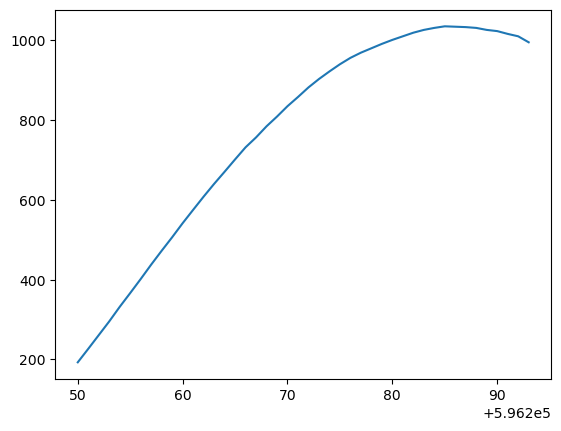

In [66]:
plt.plot(df['RS_Avg'][596250:596294])

In [23]:
df['TIMESTAMP'].values

array(['2009-01-01 00:00:00', '2009-01-01 00:10:00',
       '2009-01-01 00:20:00', ..., '2022-12-31 23:30:00',
       '2022-12-31 23:40:00', '2022-12-31 23:50:00'], dtype=object)

In [62]:
eix_y = df['RS_Avg'][596250:596295]
eix_x = func_ls_2min(ls_test)
print(eix_y.values,eix_x)

[ 192.7  226.5  260.8  295.1  331.6  366.1  401.2  437.3  472.   505.8
  541.   574.4  607.5  639.4  669.8  700.7  731.   755.8  783.6  808.
  834.   857.   881.   902.   921.   939.   955.   968.   979.   990.
 1000.  1009.  1018.  1025.  1030.  1034.  1033.  1032.  1030.  1025.
 1022.  1015.  1009.   994.   988. ] [350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0, 710.0, 720.0, 730.0, 740.0, 750.0, 760.0, 770.0, 780.0, 790.0]


In [108]:
model = np.poly1d(np.polyfit(eix_x,eix_y.values, 2))

print(model.)

polycoefficientsline = np.linspace(0, 46,45)
#plt.plot(model(polyline))
#plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),df['RS_Avg'][596250:596350],'red')

[1139.66527973  317.30446074]


In [111]:
model2 = np.poly1d(np.polyfit(eix_x,eix_y.values, 4))

print(model.coef)
print(model2.coefficients)

[-6.08345997e-03  8.86341709e+00 -2.19990613e+03]
[ 1.78146011e-08 -4.71847216e-05  3.91032585e-02 -9.65579558e+00
  5.36545079e+02]


In [115]:
results ={}
p = np.poly1d(model)
#calculate r-squared
yhat = p(eix_x)
ybar = np.sum(eix_y)/len(eix_y)
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((eix_y - ybar)**2)
results['r_squared'] = ssreg / sstot

print(results)

{'r_squared': 0.9980178369706465}


In [15]:
def f(t: float)-> float:
    return -2199.91 + 8.86342*t - 0.00608346*t**2

In [91]:
t1 = np.arange(350,1150,10)

[ 350  360  370  380  390  400  410  420  430  440  450  460  470  480
  490  500  510  520  530  540  550  560  570  580  590  600  610  620
  630  640  650  660  670  680  690  700  710  720  730  740  750  760
  770  780  790  800  810  820  830  840  850  860  870  880  890  900
  910  920  930  940  950  960  970  980  990 1000 1010 1020 1030 1040
 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140]


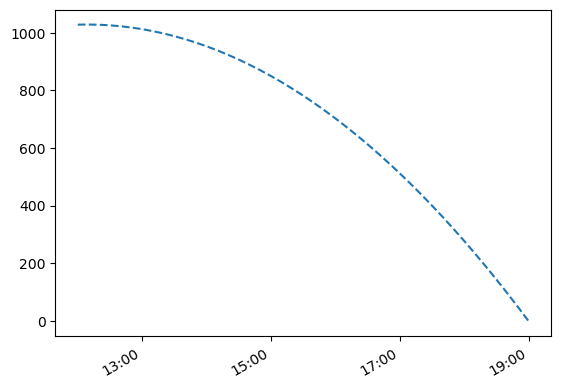

In [96]:
fig, ax = plt.subplots()

t2=pd.to_datetime(t1, unit='m').strftime('%H:%M')

y2 = np.ma.masked_where((t1<720), f(t1)) 
print(t1)
#plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596330]),f(t1),'--') 

plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596330]),y2,'--') 


ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate() 

In [85]:
t1 = np.arange(720,1150,10)

In [86]:
pd.to_datetime(t1, unit='m').strftime('%H:%M')

Index(['12:00', '12:10', '12:20', '12:30', '12:40', '12:50', '13:00', '13:10',
       '13:20', '13:30', '13:40', '13:50', '14:00', '14:10', '14:20', '14:30',
       '14:40', '14:50', '15:00', '15:10', '15:20', '15:30', '15:40', '15:50',
       '16:00', '16:10', '16:20', '16:30', '16:40', '16:50', '17:00', '17:10',
       '17:20', '17:30', '17:40', '17:50', '18:00', '18:10', '18:20', '18:30',
       '18:40', '18:50', '19:00'],
      dtype='object')

[ 720  730  740  750  760  770  780  790  800  810  820  830  840  850
  860  870  880  890  900  910  920  930  940  950  960  970  980  990
 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130
 1140]


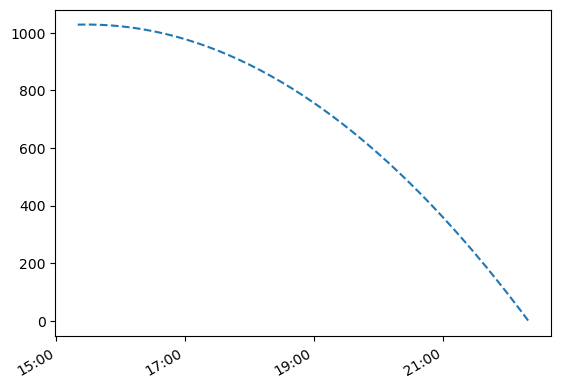

In [87]:
fig, ax = plt.subplots()

t2=pd.to_datetime(t1, unit='m').strftime('%H:%M')
print(t1)
plt.plot(pd.to_datetime(df['TIMESTAMP'][596307:596350]),f(t1),'--') 


ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate() 
# COnvertir t1 a HH:MM

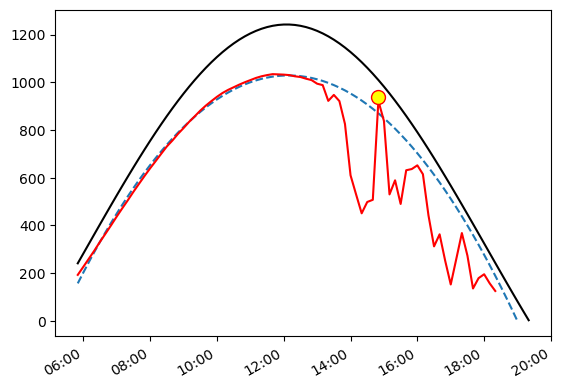

In [157]:
fig, ax = plt.subplots()

#plt.plot(pd.to_datetime(t1, unit='m').strftime('%H:%M'),f(t1),'--') 
#hh_mm = DateFormatter('%H:%M')

plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596330]),f(t1),'--') 

plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),df['RS_Avg'][596250:596350],'red') #########
plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),S0[596250:596350]/(600),'black') ###########
#plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),df['HumR1min_Avg'][596250:596350],'pink')

plt.plot(pd.to_datetime(df['TIMESTAMP'][596304]),940,marker = "o",markersize =10,markeredgecolor='red',markerfacecolor ='yellow',label = 'Cloud-enhancement')



#markers_on = ['15:00']
#plt.plot('-gD', markevery=markers_on, label='line with select markers')


ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate() 

#plt.plot(t1,f(t1),'--')

# plot kt vs humidity

In [135]:
#print(df[' : '2022-12-12 23:50:00'])
df2 = df.set_index('TIMESTAMP')['2011-01-01 00:00:00' :'2022-12-12 23:50:00']
print(df2)


                    RS_Std HumR1min_Avg  RS_Avg  zenith_angle_deg       Hour  \
TIMESTAMP                                                                      
2011-01-01 00:00:00    NaN          NaN     NaN        160.554628   0.000000   
2011-01-01 00:10:00    NaN          NaN     NaN        160.371428   0.166667   
2011-01-01 00:20:00    NaN          NaN     NaN        159.973113   0.333333   
2011-01-01 00:30:00    NaN          NaN     NaN        159.372358   0.500000   
2011-01-01 00:40:00    NaN          NaN     NaN        158.586522   0.666667   
...                    ...          ...     ...               ...        ...   
2022-12-12 23:10:00    0.0          NaN     NaN        159.141635  23.166667   
2022-12-12 23:20:00    0.0          NaN     NaN        159.824243  23.333333   
2022-12-12 23:30:00    0.0          NaN     NaN        160.310736  23.500000   
2022-12-12 23:40:00    0.0          NaN     NaN        160.586078  23.666667   
2022-12-12 23:50:00    0.0          NaN 

In [136]:
df2.to_csv('results_sliced.csv', index=True)

In [137]:
pd.read_csv('results_sliced.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_19988\260970672.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('results_sliced.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
0,2011-01-01 00:00:00,NaN,NaN,NaN,160.554628,0.000000,1.000000,NaN
1,2011-01-01 00:10:00,NaN,NaN,NaN,160.371428,0.166667,1.006944,NaN
2,2011-01-01 00:20:00,NaN,NaN,NaN,159.973113,0.333333,1.013889,NaN
3,2011-01-01 00:30:00,NaN,NaN,NaN,159.372358,0.500000,1.020833,NaN
4,2011-01-01 00:40:00,NaN,NaN,NaN,158.586522,0.666667,1.027778,NaN
...,...,...,...,...,...,...,...,...
622415,2022-12-12 23:10:00,0.0,NaN,NaN,159.141635,23.166667,346.965278,NaN
622416,2022-12-12 23:20:00,0.0,NaN,NaN,159.824243,23.333333,346.972222,NaN
622417,2022-12-12 23:30:00,0.0,NaN,NaN,160.310736,23.500000,346.979167,NaN
622418,2022-12-12 23:40:00,0.0,NaN,NaN,160.586078,23.666667,346.986111,NaN


In [97]:
print(df['HumR1min_Avg'][df['HumR1min_Avg'].notnull()])

50        14.11
51         14.5
52         16.5
53        16.47
54        16.57
          ...  
730192     35.3
730193    32.37
730194    40.83
730195    39.42
730196    33.88
Name: HumR1min_Avg, Length: 324216, dtype: object


In [124]:
#df_test = pd.read_csv('results_sliced.csv')

In [125]:
 #print(df_test['kt_10min'][40:80],df_test['TIMESTAMP'][40:80])

In [205]:
data = csv.reader(open('results_sliced.csv', 'r'), delimiter=",")#, quotechar='|')
column3, column7 =[],[]

for row in data:
    column3.extend([row[2]])
    column7.extend([row[7]])

In [206]:
print(column3[:100])
print(column7[:100])

['HumR1min_Avg', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '66.91', '67.14', '67.6', '70.26', '74.83', '72.73', '72.96', '76.68', '78.52', '78.48', '77.5', '77.97', '76.85', '78.83', '78.59', '76.16', '76.99', '77.87', '80.4', '82.3', '79.95', '78.21', '78.57', '77.15', '76.26', '76.1', '76.41', '77.74', '76.19', '76.38', '76.43', '77.28', '76.37', '76.35', '75.66', '74.38', '74.51', '75.33', '77.3', '78.69', '81.7', '85.5', '85.9', '85.5', '', '', '', '', '']
['kt_10min', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0.3641901188261421', '0.4498983737969759', '0.4512878445838084', '0.2864005747548356', '0.2598854095321942', '0.3411099534653711', '0.219354880021541', '0.16416430

In [207]:
df.columns.to_list()

['TIMESTAMP',
 'RS_Std',
 'HumR1min_Avg',
 'RS_Avg',
 'zenith_angle_deg',
 'Hour',
 'Day',
 'kt_10min']

In [208]:
col3,col7 = column3,column7
del col3[:1],col7[:1]

In [209]:
col3 =np.array(col3)
col3[col3 == ''] =np.nan
col3 = col3.astype(float)

col7 =np.array(col7)
col7[col7 == ''] =np.nan
col7 = col7.astype(float)

In [143]:
len(col7)

622420

In [144]:
print(col3[:100])
print(col7[:100])

[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan 66.91 67.14 67.6  70.26 74.83 72.73 72.96 76.68 78.52 78.48
 77.5  77.97 76.85 78.83 78.59 76.16 76.99 77.87 80.4  82.3  79.95 78.21
 78.57 77.15 76.26 76.1  76.41 77.74 76.19 76.38 76.43 77.28 76.37 76.35
 75.66 74.38 74.51 75.33 77.3  78.69 81.7  85.5  85.9  85.5    nan   nan
   nan   nan   nan   nan]
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan

In [145]:
print(kt)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
730242   NaN
730243   NaN
730244   NaN
730245   NaN
730246   NaN
Length: 730247, dtype: float64


In [146]:
hum_rel = df['HumR1min_Avg'][::]
print(hum_rel)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
730242    NaN
730243    NaN
730244    NaN
730245    NaN
730246    NaN
Name: HumR1min_Avg, Length: 730247, dtype: object


In [ ]:
#df = df.replace(nan, np.nan)

# dubte queda desplaçada la series si llevam els nans ja que tenim els kt tallat per sza i els seus corresponents 
# hum relatius no sortirien i estara desfasat


# he de llevar els hum_rel que corresponen als nans i llevar els nans de kt

In [87]:
df['HumR1min_Avg'].mask([df['kt_10min'].mask == True]) = np.nan

C:\Users\T.C\AppData\Local\Temp\ipykernel_19988\3769247174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HumR1min_Avg'][df['kt_10min'] == np.nan] = np.nan


In [178]:
df['HumR1min_Avg'][df['zenith_angle_deg']>83] = np.nan

C:\Users\T.C\AppData\Local\Temp\ipykernel_19988\1240071677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HumR1min_Avg'][df['zenith_angle_deg']>83] = np.nan


In [104]:
#df.to_csv('results_hum.csv', index=False)

In [105]:
pd.read_csv('results_hum.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_19988\1983528225.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('results_hum.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
0,2009-01-01 00:00:00,NaN,NaN,NaN,160.519214,0.000000,1.000000,NaN
1,2009-01-01 00:10:00,NaN,NaN,NaN,160.341724,0.166667,1.006944,NaN
2,2009-01-01 00:20:00,NaN,NaN,NaN,159.949193,0.333333,1.013889,NaN
3,2009-01-01 00:30:00,NaN,NaN,NaN,159.354097,0.500000,1.020833,NaN
4,2009-01-01 00:40:00,NaN,NaN,NaN,158.573632,0.666667,1.027778,NaN
...,...,...,...,...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,NaN,NaN,158.271643,23.166667,365.965278,NaN
730243,2022-12-31 23:20:00,0.0,NaN,NaN,159.116401,23.333333,365.972222,NaN
730244,2022-12-31 23:30:00,0.0,NaN,NaN,159.782794,23.500000,365.979167,NaN
730245,2022-12-31 23:40:00,0.0,NaN,NaN,160.252351,23.666667,365.986111,NaN


# Volem fer un fitxer per a mati

In [322]:
df_m = pd.read_csv('results_hum.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_19988\2595278663.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m = pd.read_csv('results_hum.csv')


In [323]:
df_m['TIMESTAMP'] = pd.to_datetime(df_m['TIMESTAMP'])

In [324]:
#df_m['kt_10min'][pd.to_datetime(df_m['kt_10min']).hour >= 12] == np.nan


df_m['kt_10min'][df_m['TIMESTAMP'].dt.hour < 12] = np.nan # < i > =
#df_m = df_m.set_index('TIMESTAMP')['2011-01-01 00:00:00' :'2022-12-12 23:50:00']
#df_m.to_csv('results_hum_tarda.csv', index=False)

C:\Users\T.C\AppData\Local\Temp\ipykernel_19988\1923785434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['kt_10min'][df_m['TIMESTAMP'].dt.hour < 12] = np.nan # < i > =


In [325]:
df_m = df_m.set_index('TIMESTAMP')['2011-01-01 00:00:00' :'2022-12-12 23:50:00']
df_m.to_csv('results_hum_tarda.csv', index=True)

In [ ]:
pd.read_csv('results_hum_mati.csv')

In [ ]:
pd.read_csv('results_hum_tarda.csv')

In [294]:
#print(df_m[60:90])

             TIMESTAMP RS_Std HumR1min_Avg  RS_Avg  zenith_angle_deg  \
60 2009-01-01 10:00:00    NaN        14.51   250.5         70.819709   
61 2009-01-01 10:10:00    NaN        14.49   240.4         69.972175   
62 2009-01-01 10:20:00    NaN        15.35   263.4         69.190727   
63 2009-01-01 10:30:00    NaN        16.54   295.9         68.477729   
64 2009-01-01 10:40:00    NaN        19.12   302.9         67.835431   
65 2009-01-01 10:50:00    NaN        19.74   283.8         67.265937   
66 2009-01-01 11:00:00    NaN        19.66   283.0         66.771183   
67 2009-01-01 11:10:00    NaN        21.13   322.1         66.352901   
68 2009-01-01 11:20:00    NaN        24.12   304.7         66.012596   
69 2009-01-01 11:30:00    NaN        21.68   344.7         65.751519   
70 2009-01-01 11:40:00    NaN        17.52   378.2         65.570650   
71 2009-01-01 11:50:00    NaN        17.82   368.6         65.470673   
72 2009-01-01 12:00:00    NaN        19.39   365.8         65.45

In [202]:
print(len(col3),len(col7))

622420 622420


In [217]:
mask = ~(np.isnan(col3) | np.isnan(col7))


In [218]:
x = col3[mask]
print(x)

[66.91 67.14 67.6  ... 96.6  96.4  96.8 ]


In [220]:
y=col7[mask]
print(y)

[0.36419012 0.44989837 0.45128784 ... 0.1064149  0.09206927 0.09215235]


In [221]:
print(len(x),len(y))

276658 276658


In [165]:
from scipy import stats

In [223]:
res = stats.linregress(x, y)
print(res.rvalue)
print(f"R-squared: {res.rvalue**2:.6f}")

-0.5320068714528393
R-squared: 0.283031


Weak correlation bordering on moderate


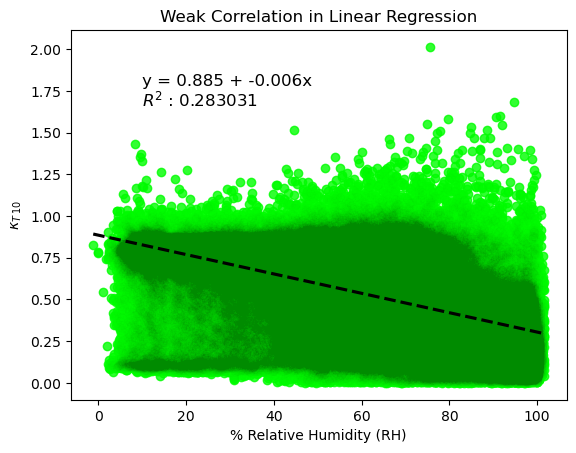

In [280]:
#fig, ax = plt.subplots()

# BLUE sns GREY scatter
# LIME sns GREY scatter

#ax = sns.regplot(x="total_bill", y="tip", data=tips, color='b', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})


p=sns.regplot(x=x,y=y,scatter_kws={"color": "lime"}, line_kws={"color": "black"})

#p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 95, fit_reg = True, color = 'blue')


#sns.regplot(x=x,y=y,scatter_kws={"color": "lime"}, line_kws={"color": "black"},scatter =False,ci=95,fit_reg = True)

p.lines[0].set_linestyle("--")

plt.scatter(x=x,y=y,color ='forestgreen',alpha =0.005)

plt.xlabel('% Relative Humidity (RH)')
plt.ylabel(r'$\kappa_{T\;10}$')
plt.title('Weak Correlation in Linear Regression')

#---------------------------------------------------------------------------------------------

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())



#add regression equation to plot
plt.text(10, 1.78, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x',color = 'black',fontsize=12)
plt.text(10,1.66,fr'$R^{2}$ : {0.283031}',color ='black',fontsize=12)


#---------------------------------------------------------------------------------------------

#plt.savefig('kt_vs_humrel_green')
print('Weak correlation bordering on moderate')

# com fer la regressió tengui una àrea exemples internet ?


In [166]:
def polynomial_regression(X, y, order=1, confidence=95, num=100):
    confidence = 1 - ((1 - (confidence / 100)) / 2)
    y_model = np.polyval(np.polyfit(X, y, order), X)
    residual = y - y_model
    n = X.size                     
    m = 2                          
    dof = n - m  
    t = stats.t.ppf(confidence, dof) 
    std_error = (np.sum(residual**2) / dof)**.5
    X_line = np.linspace(np.min(X), np.max(X), num)
    y_line = np.polyval(np.polyfit(X, y, order), X_line)
    ci = t * std_error * (1/n + (X_line - np.mean(X))**2 / np.sum((X - np.mean(X))**2))**.5
    return X_line, y_line, ci

In [175]:
#X = np.linspace(0,1,100)
#y1 = np.random.random(100)

X_line, y_line, ci = polynomial_regression(x, y, order=1)

plt.scatter(x, y)
plt.plot(X_line, y_line)
plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5)

TypeError: expected x and y to have same length

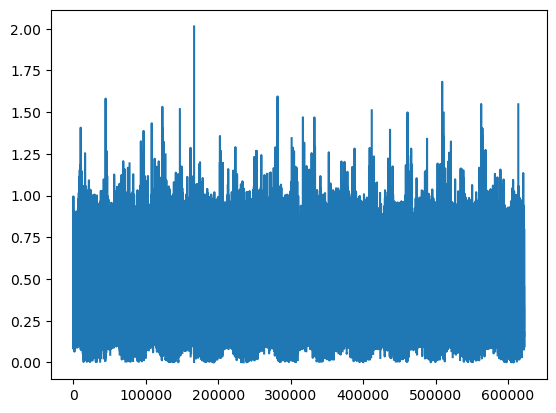

In [160]:
plt.plot(col7)

In [83]:
col7[np.isfinite(col7)==False] = np.nan
print(col7[:100])

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.2059562  0.20995257 0.21911928 0.20868957
 0.21618611 0.46632373 0.56697777 0.58525462 0.57695782 0.51899089
 0.54202924 0.49730463 0.52362184 0.5679447  0.56377438 0.51430326
 0.50123779 0.55957965 0.52101623 0.58205828 0.63268811 0.61281918
 0.60628314 0.62549588 0.64702655 0.71491794 0.64680265 0.68930939
 0.59800229 0.56412674 0.52227941 0.44112889 0.43780376 0.46553242
 0.43292317 0.45279875 0.52770369 0.54396682 0.42292631 0.3918

In [85]:
np.isfinite(col7[0])

False

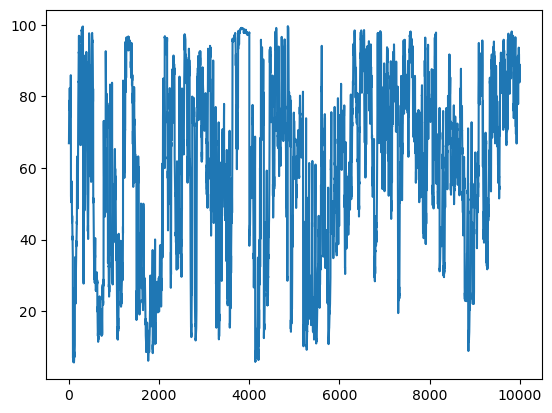

In [55]:
print(col7[:100].split())

AttributeError: 'numpy.ndarray' object has no attribute 'split'

ValueError: '15:00' is not a valid format string (unrecognized character '5')

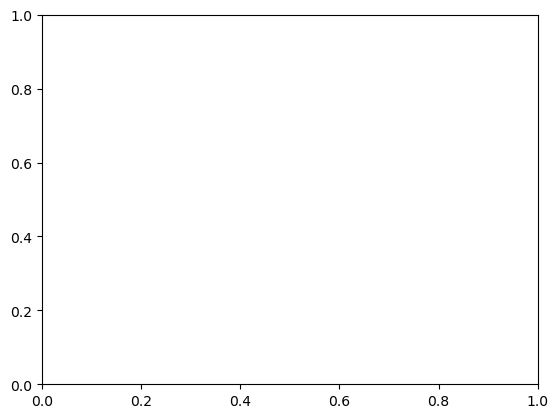

In [18]:
x = [4]
y=[3]

plt.plot(900,'15:00',marker = "o",markersize =10,markeredgecolor='red',markerfacecolor ='yellow')

In [53]:
df['kt'] = 600*df['RS_Avg']/S0

In [88]:
new_kt = kt[105091::]
new_kt

105091   NaN
105092   NaN
105093   NaN
105094   NaN
105095   NaN
          ..
730242   NaN
730243   NaN
730244   NaN
730245   NaN
730246   NaN
Length: 625156, dtype: float64

In [79]:
df.loc[,:]

TIMESTAMP           2009-01-01 00:20:00
RS_Std                              NaN
HumR1min_Avg                      14.61
RS_Avg                              NaN
zenith_angle_deg             159.949193
Hour                           0.333333
Day                            1.013889
kt_10min                            NaN
kt                                  NaN
Name: 2, dtype: object

# Boníssim per trobar els indexos

In [86]:
# pandas.Series.between() function Using two dates
df2 = df.loc[df["TIMESTAMP"].between("2011-01-01", "2011-01-02")]
df2

,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min,kt
105091,2011-01-01 00:00:00,NaN,34.78,NaN,160.554628,0.000000,1.000000,NaN,NaN
105092,2011-01-01 00:10:00,NaN,33.86,NaN,160.371428,0.166667,1.006944,NaN,NaN
105093,2011-01-01 00:20:00,NaN,31.77,NaN,159.973113,0.333333,1.013889,NaN,NaN
105094,2011-01-01 00:30:00,NaN,32.03,NaN,159.372358,0.500000,1.020833,NaN,NaN
105095,2011-01-01 00:40:00,NaN,33.04,NaN,158.586522,0.666667,1.027778,NaN,NaN
...,...,...,...,...,...,...,...,...,...
105230,2011-01-01 23:10:00,NaN,38.95,NaN,158.159102,23.166667,1.965278,NaN,NaN
105231,2011-01-01 23:20:00,NaN,33.34,NaN,159.009413,23.333333,1.972222,NaN,NaN
105232,2011-01-01 23:30:00,NaN,33.57,NaN,159.682581,23.500000,1.979167,NaN,NaN
105233,2011-01-01 23:40:00,NaN,31.06,NaN,160.160158,23.666667,1.986111,NaN,NaN


In [ ]:
plt.plot(kt)

# Process dataset
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin['Open'] = pd.to_numeric(bitcoin['Open'])

# Plot
plt.figure()
plt.plot(bitcoin['Date'], bitcoin['Open'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()

In [32]:
#df['TIMESTAMP'] = pd.to_datetime(df['Date'])
#df['TIMESTAMP'] = pd.to_numeric(bitcoin['Open'])

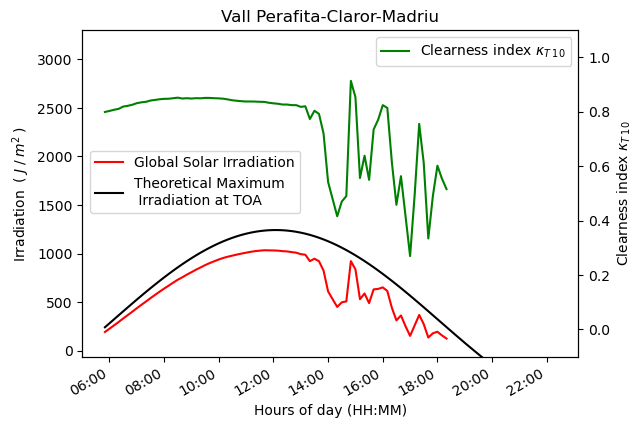

In [66]:
fig, ax = plt.subplots()

#hours = mdates.HourLocator(interval = 1)
hh_mm = DateFormatter('%H:%M')

#hours = pd.to_datetime(df['TIMESTAMP'][80500:81200]).dt.hour      ############################

plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),df['RS_Avg'][596250:596350],'red') #########
plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),S0[596250:596350]/(600),'black') ###########
#plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),kt[596250:596350]*2000)
ax = plt.gca()


plt.xlabel('Hours of day (HH:MM)')
#plt.ylabel(r'Irradiation $\frac{\J}{m^{2}}$')
plt.ylabel(r'Irradiation $\;(\;J\;/\;m^{2}\;)$')
plt.ylim(-60,3300)

ax2 = ax.twinx() 

#secax = ax.secondary_xaxis('top', functions=(one_over, inverse))
#secay = ax.secondary_yaxis('right')#,functions =(0,0.9133918615367415))
#,functions=(pd.to_datetime(df['TIMESTAMP'][491750:491900]),kt[491750:491900] + 1400))


#plt.plot(kt[491750:491900]*1000)                           #############################
ax2.set_ylabel(r'Clearness index $\kappa_{T\;10}$')
#secax.set_xlabel('period [s]')
ax2.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),kt[596250:596350],'green')
ax2.set_ylim(-0.1,1.1)

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate() 

plt.title(r'Vall Perafita-Claror-Madriu')
ax.legend(['Global Solar Irradiation','Theoretical Maximum \n Irradiation at TOA'],loc= (0.015, 0.44))#r'Clearness index $\kappa_{T\;10}$'])
ax2.legend([r'Clearness index $\kappa_{T\;10}$'],loc=1)
#plt.savefig('Multiple_axis_intro2_espais')
plt.show()

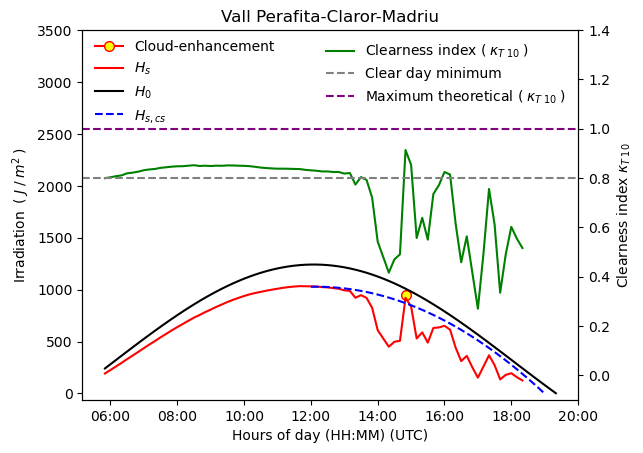

We have approximated the graph's Es for a second order polynomial equation given we are close to the maximum this approximation is reasonable


In [177]:
fig, ax = plt.subplots()


plt.plot(pd.to_datetime(df['TIMESTAMP'][596304]),945,marker = "o",markersize =7,color ='red',markeredgecolor='red',markerfacecolor ='yellow',label = 'Cloud-enhancement')

plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),df['RS_Avg'][596250:596350],'red') #########
plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),S0[596250:596350]/(600),'black') ###########


ax = plt.gca()


plt.xlabel('Hours of day (HH:MM) (UTC)')
plt.ylabel(r'Irradiation $\;(\;J\;/\;m^{2}\;)$')
#plt.plot(pd.to_datetime(df['TIMESTAMP'][596304]),945,marker = "o",markersize =7,color ='red',markeredgecolor='red',markerfacecolor ='yellow',label = 'Cloud-enhancement')

#plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596330]),f(t1),'--',color='blue') #-----------------
#plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596293]),f(t1),'--')
plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596330]),y2,'--',color='blue') 

plt.ylim(-60,3500)

ax2 = ax.twinx() 

                    
ax2.set_ylabel(r'Clearness index $\kappa_{T\;10}$')
ax2.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),kt[596250:596350],'green')
ax2.set_ylim(-0.1,1.4)

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


plt.title(r'Vall Perafita-Claror-Madriu')
ax.legend(['Cloud-enhancement','$H_s$','$H_0$',r'$H_{s,cs}$'],loc= (0.015, 0.73),frameon =False)#r'Clearness index $\kappa_{T\;10}$'])

ax2.axhline(y=0.8, color='gray', linestyle='--')
ax2.axhline(y=1, color='purple', linestyle='--')
ax2.legend([r'Clearness index $(\;\kappa_{T\;10}\;)$', 'Clear day minimum',r'Maximum theoretical $(\; \kappa_{T\;10} \;)$'],loc=1,frameon =False)

plt.savefig('Multiple_axis_intro2_espais_eq_UTC_extra_1_08_new_cyan')


plt.show()

print("We have approximated the graph's Es for a second order polynomial equation given we are close to the maximum this approximation is reasonable")

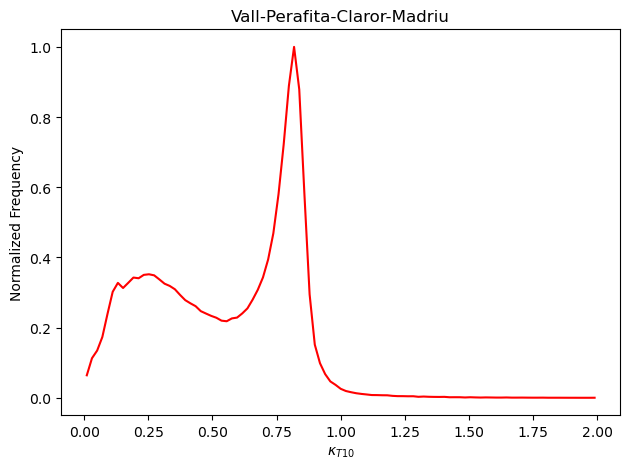

In [225]:
n,x,_ = plt.hist(kt, bins = np.linspace(0,2,100), histtype=u'step' )
plt.clf()
bin_centers = 0.5*(x[1:]+x[:-1])
maxim = np.amax(n)
#print(maxim)
#y= range(len(n/maxim))
#x1=range(len(bin_centers))
plt.plot(bin_centers,n/maxim,'red') ## using bin_centers rather than edges   ,n
#plt.yscale('log')


#plt.ylim(5E-7,1)


plt.title('Vall-Perafita-Claror-Madriu')  
plt.xlabel(r'$\kappa_{T10}$')  
plt.ylabel('Normalized Frequency') 
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

plt.tight_layout()
plt.savefig('kt10_hist_lines_0')

plt.show()


# Funció de distribució de probabilitat acumulada

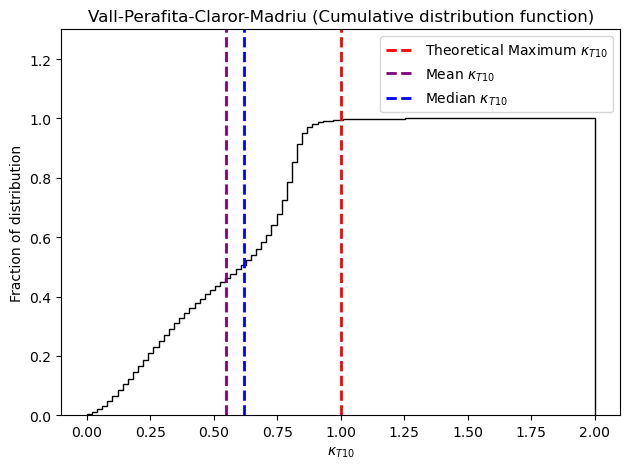

In [247]:
n,x,_ = plt.hist(new_kt, bins = np.linspace(0,2,100), histtype=u'step', density = True ,cumulative = True,color = 'black')
#plt.clf()
#bin_centers = 0.5*(x[1:]+x[:-1])
#maxim = np.amax(n)
#print(maxim)
#y= range(len(n/maxim))
#x1=range(len(bin_centers))
#plt.plot(x,n/maxim,'red')## using bin_centers rather than edges   ,n
#plt.plot(bin_centers)
#plt.yscale('log')


#plt.ylim(5E-7,1)


plt.title('Vall-Perafita-Claror-Madriu (Cumulative distribution function)')  
plt.xlabel(r'$\kappa_{T10}$')  
plt.ylabel('Fraction of distribution') 
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

# multiple lines all full height
plt.vlines(x=1, ymin=0, ymax=1.30, colors='red', ls='--', lw=2, label=r'Theoretical Maximum $\kappa_{T10}$')
plt.vlines(x=new_kt.mean(),ymin=0, ymax=1.30, colors='purple', ls='--', lw=2, label=r'Mean $\kappa_{T10}$')
plt.vlines(x=new_kt.median(),ymin=0, ymax=1.30, colors='blue', ls='--', lw=2, label=r'Median $\kappa_{T10}$')

plt.ylim(0,1.30)
plt.legend(loc=1)

plt.tight_layout()
plt.savefig('kt10_prob_distr_func')

plt.show()

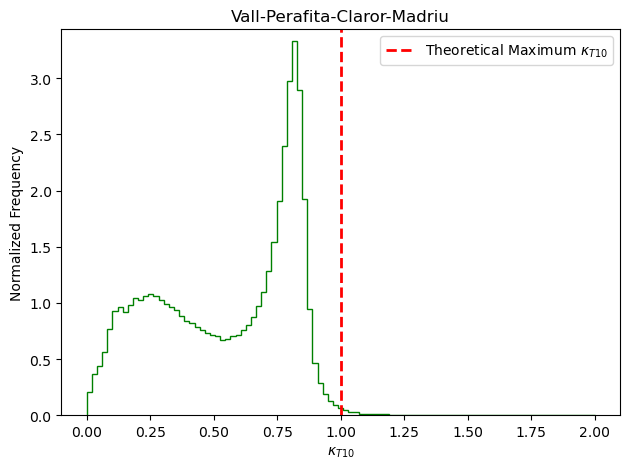

In [192]:
nn,x,_ = plt.hist(new_kt, bins = np.linspace(0,2,100), histtype=u'step', density= True,color = 'green' )
#plt.clf()
#bin_centers = 0.5*(x[1:]+x[:-1])
#maxim = np.amax(n)
#print(maxim)
#y= range(len(n/maxim))
#x1=range(len(bin_centers))
#plt.plot(bin_centers,n/maxim,'red')## using bin_centers rather than edges   ,n
#plt.plot(bin_centers)
#plt.yscale('log')


#plt.ylim(5E-7,1)


plt.title('Vall-Perafita-Claror-Madriu')  
plt.xlabel(r'$\kappa_{T10}$')  
plt.ylabel('Normalized Frequency') 
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))


plt.vlines(x=1, ymin=0,ymax =max(nn)+0.1, colors='red', ls='--', lw=2, label=r'Theoretical Maximum $\kappa_{T10}$')
plt.ylim(0,max(nn)+0.1)
plt.legend(loc=1)


plt.tight_layout()

plt.savefig('kt10_hist_0')
plt.show()

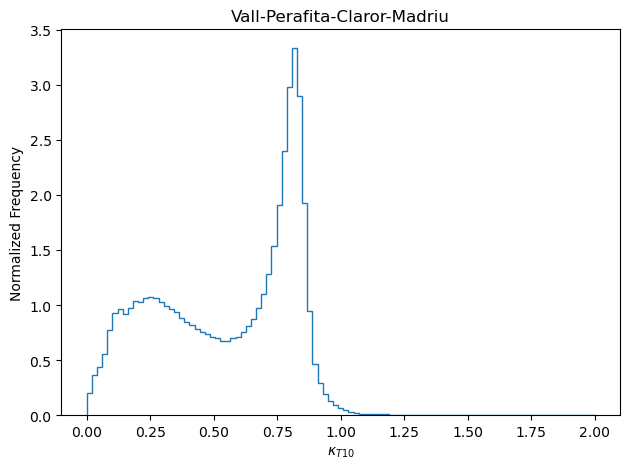

In [134]:
n,x,_ = plt.hist(new_kt, bins = np.linspace(0,2,100), histtype=u'step', density =1)
#plt.clf()
#bin_centers = 0.5*(x[1:]+x[:-1])
#binsx = x[1::]
#maxim = np.amax(n)
#print(maxim)
#y= range(len(n/maxim))
#x1=range(len(bin_centers))
#plt.plot(bin_centers,n/maxim,'red')## using bin_centers rather than edges   ,n
#plt.hist(np.linspace(0,2,100),n/maxim)
#plt.yscale('log')


#plt.ylim(5E-7,1)


plt.title('Vall-Perafita-Claror-Madriu')  
plt.xlabel(r'$\kappa_{T10}$')  
plt.ylabel('Normalized Frequency') 
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

plt.tight_layout()


plt.show()

In [ ]:
plt.plot(bin_centers,n/maxim,'red')## using bin_centers rather than edges   ,n
plt.hist(np.linspace(0,2,100),n/maxim)

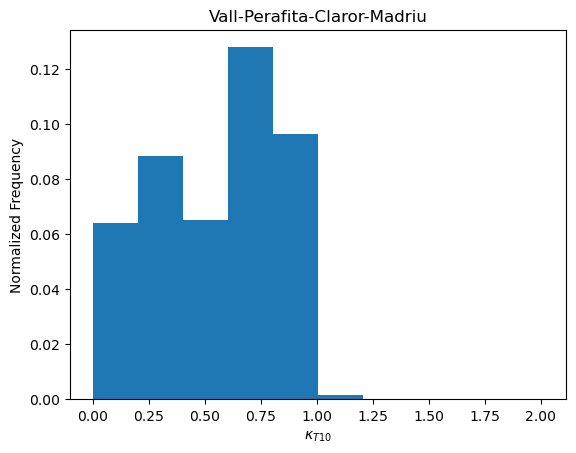

In [150]:
myarray = new_kt
weights = np.ones_like(myarray) / len(myarray)
plt.hist(myarray, weights=weights)
plt.title('Vall-Perafita-Claror-Madriu')  
plt.xlabel(r'$\kappa_{T10}$')  
plt.ylabel('Normalized Frequency') 
plt.savefig('k10_hist_1')

0.5500643075536057
0.6170395481343214


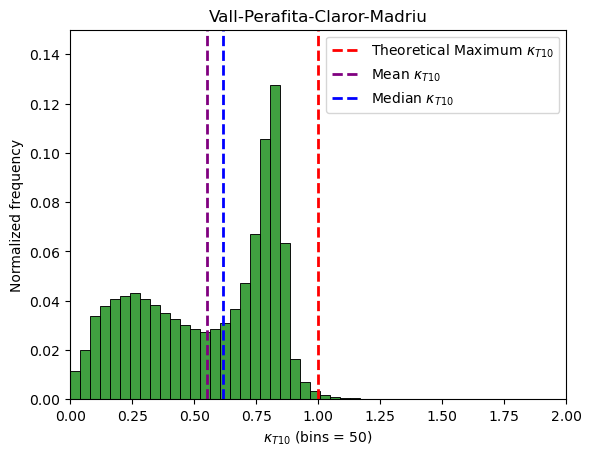

In [137]:
sns.histplot(data= kt, stat = 'probability',bins =50,color = 'green') # fer això amb un kt diari

# PROVAR DE FER ELS BINS DINTRE DE RANG DETERMINAT [0,2]

plt.vlines(x=1, ymin = 0,ymax= 0.15, colors='red', ls='--', lw=2, label=r'Theoretical Maximum $\kappa_{T10}$')
plt.vlines(x=kt.mean(),ymin = 0,ymax= 0.15, colors='purple', ls='--', lw=2, label=r'Mean $\kappa_{T10}$')
plt.vlines(x=kt.median(),ymin = 0,ymax= 0.15, colors='blue', ls='--', lw=2, label=r'Median $\kappa_{T10}$')

plt.ylim(0,0.15)
plt.xlim(0,2)
plt.legend(loc=1)

plt.ylabel('Normalized frequency')
plt.xlabel(r'$\kappa_{T10}$ (bins = 50)')
plt.title('Vall-Perafita-Claror-Madriu')
plt.savefig('kt10_hist_sns_median')
print(kt.mean())
print(kt.median())

0.5468946401974358
0.5996316885751136


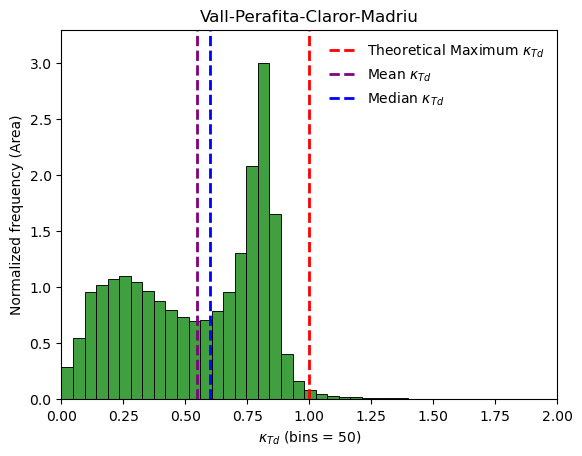

In [183]:
sns.histplot(data= kt[733::], stat = 'density',bins =50,color = 'green') # 733 -> 2011:01:01 
plt.ylabel('Normalized frequency (Area)')
plt.xlabel(r'$\kappa_{Td}$ (bins = 50)')
plt.title('Vall-Perafita-Claror-Madriu')


plt.vlines(x=1, ymin=0,ymax =3.3, colors='red', ls='--', lw=2, label=r'Theoretical Maximum $\kappa_{Td}$')
plt.vlines(x=kt.mean(), ymin=0,ymax = 3.3, colors='purple', ls='--', lw=2, label=r'Mean $\kappa_{Td}$')
plt.vlines(x=kt.median(), ymin=0,ymax =3.3, colors='blue', ls='--', lw=2, label=r'Median $\kappa_{Td}$')
#plt.vlines(x=kt.mode(kt), ymin=0,ymax =0.07, colors='pink', ls='--', lw=2, label=r'Median $\kappa_{Td}$')

plt.ylim(0,3.3)
plt.legend(loc=1,frameon = False)


plt.xlim(0,2)
plt.savefig('kt10_hist_0_median_new_density')
print(kt.mean())
print(kt.median())

In [59]:
print(max(kt[kt!=np.nan]))

nan


In [61]:
# TALLAR 2011 ENDAVANT

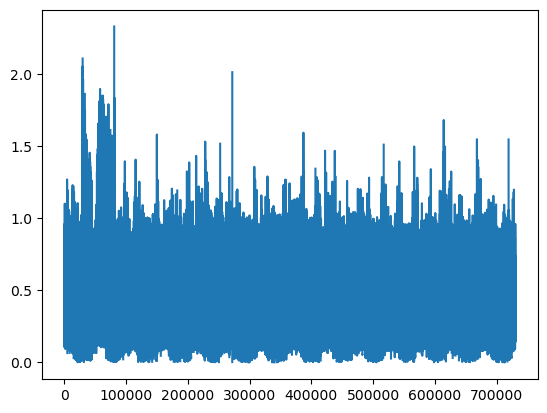

In [60]:
plt.plot(kt)

# Els kts semblen tenir una desviació com haviem comentat abans de tallar abans de 2011 però en el diari "clearness index.ypnb" tenim un comportament molt "més"normal MIRAR FLETXA----------------------------->

# Nou kt a partir de 2011

In [120]:
print(len(new_kt))
print(len(kt))

625156
730247


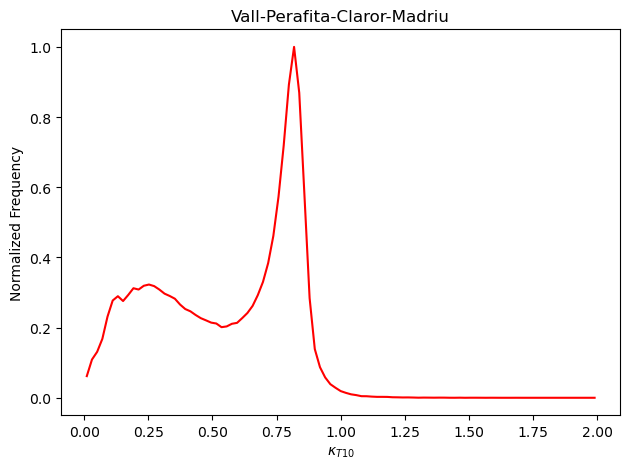

In [118]:
n,x,_ = plt.hist(new_kt, bins = np.linspace(0,2,100), histtype=u'step' )
plt.clf()
bin_centers = 0.5*(x[1:]+x[:-1])
maxim = np.amax(n)
#print(maxim)
#y= range(len(n/maxim))
#x1=range(len(bin_centers))
plt.plot(bin_centers,n/maxim,'red') ## using bin_centers rather than edges   ,n
#plt.yscale('log')


#plt.ylim(5E-7,1)


plt.title('Vall-Perafita-Claror-Madriu')  
plt.xlabel(r'$\kappa_{T10}$')  
plt.ylabel('Normalized Frequency') 
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))

plt.tight_layout()


plt.show()

Text(0.5, 1.0, 'Vall-Perafita-Claror-Madriu')

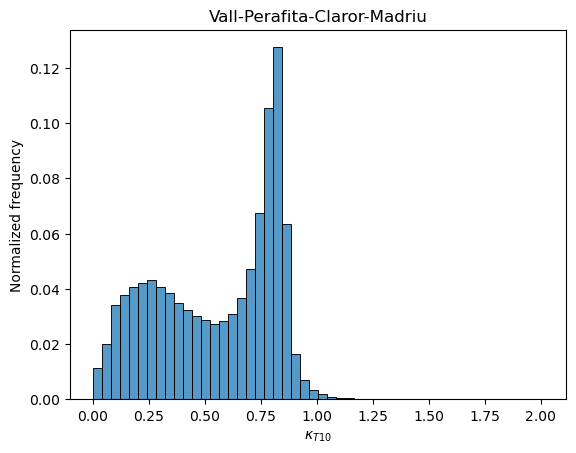

In [146]:
sns.histplot(data= new_kt, stat = 'probability',bins =50) # fer això amb un kt diari

plt.ylabel('Normalized frequency')
plt.xlabel(r'$\kappa_{T10}$')
plt.title('Vall-Perafita-Claror-Madriu')

# quines?

statstr
Aggregate statistic to compute in each bin.

count: show the number of observations in each bin

frequency: show the number of observations divided by the bin width

probability or proportion: normalize such that bar heights sum to 1

percent: normalize such that bar heights sum to 100

density: normalize such that the total area of the histogram equals 1

# Demanar un perfil de dades si em pot dir els indexos en l'array millor que la data, però sinó la data.
# I canviar els eixos y

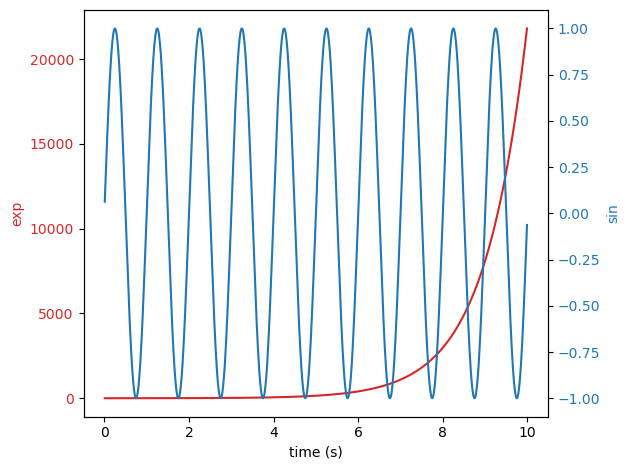

In [102]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

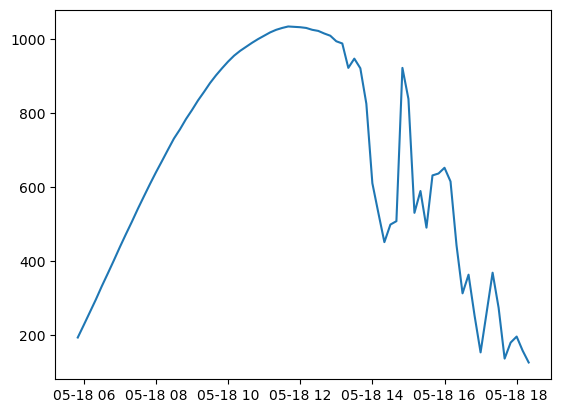

In [63]:
plt.plot(pd.to_datetime(df['TIMESTAMP'][596250:596350]),df['RS_Avg'][596250:596350])
#plt.plot(pd.to_datetime(df['TIMESTAMP'][495050:496200]),S0[495050:496200]/600)

0.9133918615367415


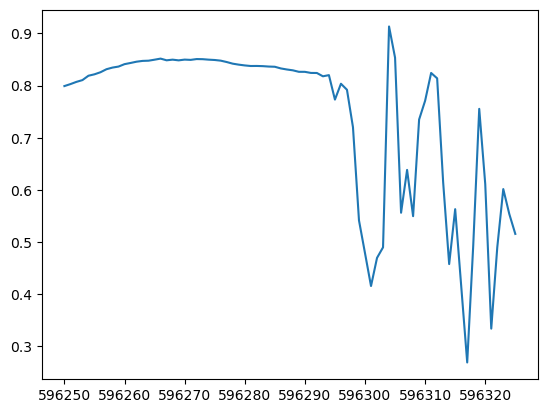

In [99]:
plt.plot(kt[596250:596350])
print(max(kt[596250:596350]))

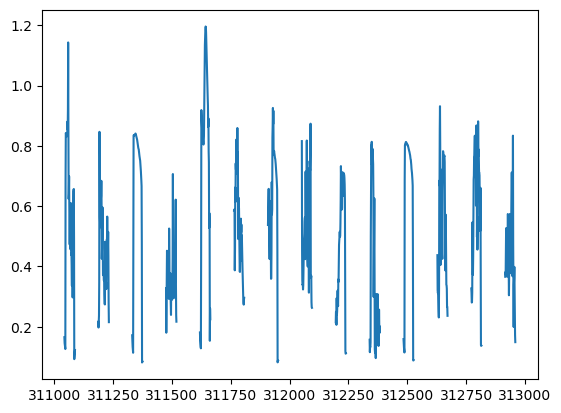

In [94]:
plt.plot(kt[311_000:313_000])

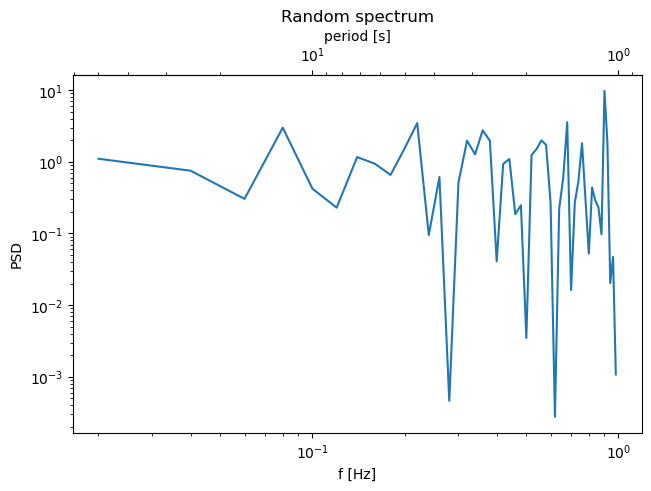

In [32]:
fig, ax = plt.subplots(layout='constrained')
x = np.arange(0.02, 1, 0.02)
np.random.seed(19680801)
y = np.random.randn(len(x)) ** 2
ax.loglog(x, y)
ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')


def one_over(x):
    """Vectorized 1/x, treating x==0 manually"""
    x = np.array(x, float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / x[~near_zero]
    return x


# the function "1/x" is its own inverse
inverse = one_over


secax = ax.secondary_xaxis('top', functions=(one_over, inverse))
secax.set_xlabel('period [s]')
plt.show()

In [13]:
df[df['RS_Avg']<0 ]=np.nan

In [179]:
lst1 = df['RS_Avg'] 
lst1 = np.array(lst1)

In [93]:
S0[22543]

675040.944936096

In [180]:
np.where(lst1 <0)

(array([], dtype=int64),)

In [51]:
df['TIMESTAMP']  = pd.to_datetime(df['TIMESTAMP'])

In [78]:
a = pd.read_csv('results_1.csv', index_col=0, parse_dates=True, infer_datetime_format=True)

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\1057316088.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('results_1.csv', index_col=0, parse_dates=True, infer_datetime_format=True)


In [55]:
b = a[::-1]

In [82]:
a.loc['2009-06-06'][70:100]

,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
TIMESTAMP,,,,,,,
2009-06-06 11:40:00,NaN,83.8,437.2,19.951514,11.666667,6.486111,0.718167
2009-06-06 11:50:00,NaN,86.2,493.7,19.792440,11.833333,6.493056,0.806032
2009-06-06 12:00:00,NaN,85.8,843.0,19.851778,12.000000,6.500000,1.372106
2009-06-06 12:10:00,NaN,86.2,758.4,20.127557,12.166667,6.506944,1.234371
2009-06-06 12:20:00,NaN,85.6,510.7,20.610933,12.333333,6.513889,0.833714
2009-06-06 12:30:00,NaN,87.1,318.0,21.287501,12.500000,6.520833,0.522286
2009-06-06 12:40:00,NaN,86.8,505.3,22.139182,12.666667,6.527778,0.837542
2009-06-06 12:50:00,NaN,84.7,790.7,23.146189,12.833333,6.534722,1.326842
2009-06-06 13:00:00,NaN,82.6,526.1,24.288658,13.000000,6.541667,0.896688


In [67]:
b['2009-06-06']#[50:100]

C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\983198295.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  b['2009-06-06']#[50:100]


,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
TIMESTAMP,,,,,,,
2009-06-06 23:50:00,NaN,86.6,NaN,114.776604,23.833333,6.993056,NaN
2009-06-06 23:40:00,NaN,87.4,NaN,114.717278,23.666667,6.986111,NaN
2009-06-06 23:30:00,NaN,87.7,NaN,114.576522,23.500000,6.979167,NaN
2009-06-06 23:20:00,NaN,87.5,NaN,114.354876,23.333333,6.972222,NaN
2009-06-06 23:10:00,NaN,88.7,NaN,114.053182,23.166667,6.965278,NaN
...,...,...,...,...,...,...,...
2009-06-06 00:40:00,NaN,88.9,NaN,113.946488,0.666667,6.027778,NaN
2009-06-06 00:30:00,NaN,87.2,NaN,114.293503,0.500000,6.020833,NaN
2009-06-06 00:20:00,NaN,83.4,NaN,114.560959,0.333333,6.013889,NaN


In [119]:
df['TIMESTAMP'][29000:45000]

28000    2009-07-14 16:30:00
28001    2009-07-14 16:40:00
28002    2009-07-14 16:50:00
28003    2009-07-14 17:00:00
28004    2009-07-14 17:10:00
                ...         
49995    2009-12-14 09:20:00
49996    2009-12-14 09:30:00
49997    2009-12-14 09:40:00
49998    2009-12-14 09:50:00
49999    2009-12-14 10:00:00
Name: TIMESTAMP, Length: 22000, dtype: object

In [81]:
kt= 600*df['RS_Avg']/S0
kt

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
730242   NaN
730243   NaN
730244   NaN
730245   NaN
730246   NaN
Length: 730247, dtype: float64

In [95]:
df['kt_10min'] = 600*df['RS_Avg']/S0
df.to_csv('results_1.csv', index=False)

In [182]:
np.where(kt>2)

(array([  5283,   5427,   5570, ..., 723509, 723653, 723797], dtype=int64),)

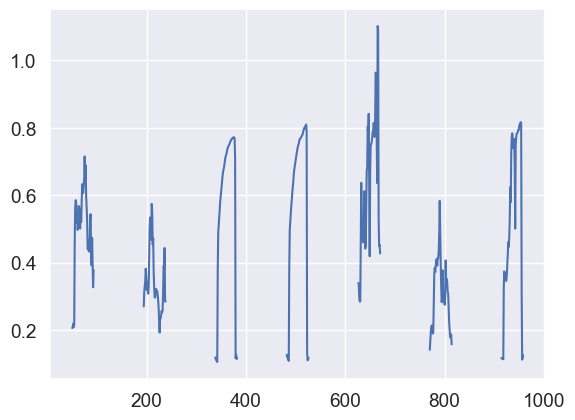

In [37]:
plt.plot(kt[:1000])

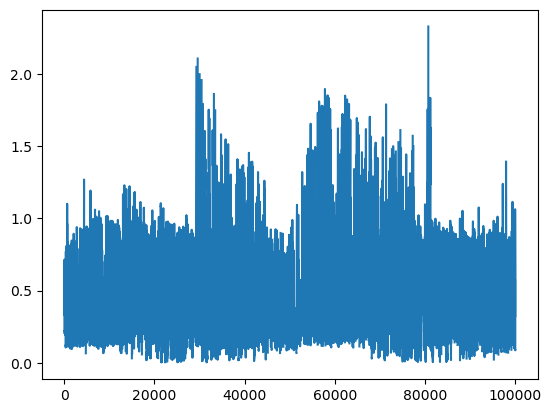

In [15]:
plt.plot(kt[:100000])

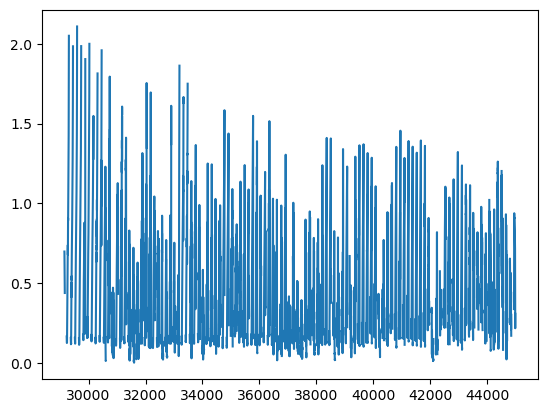

In [124]:
plt.plot(kt[29150:45000])

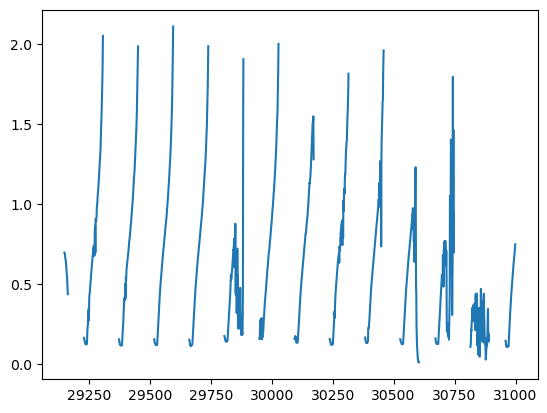

In [125]:
plt.plot(kt[29150:31000])

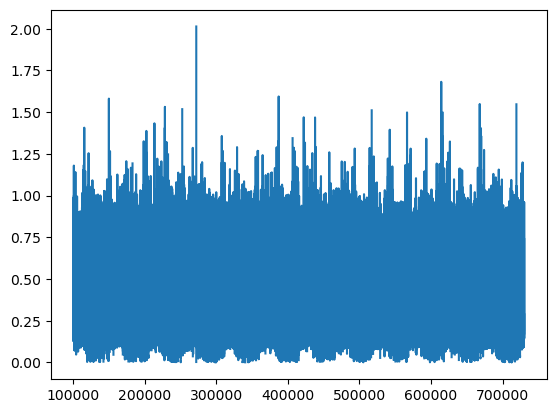

In [97]:
plt.plot(kt[100000:1050000])

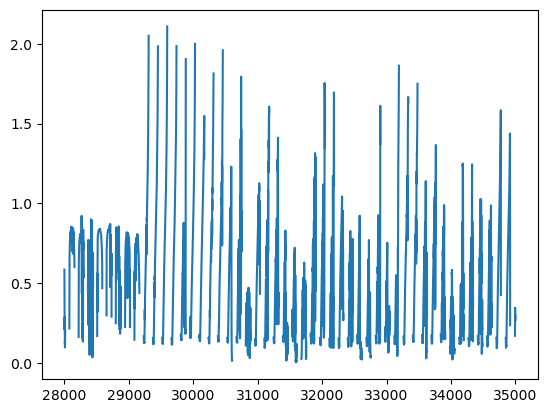

In [128]:
plt.plot(kt[28000:35000])

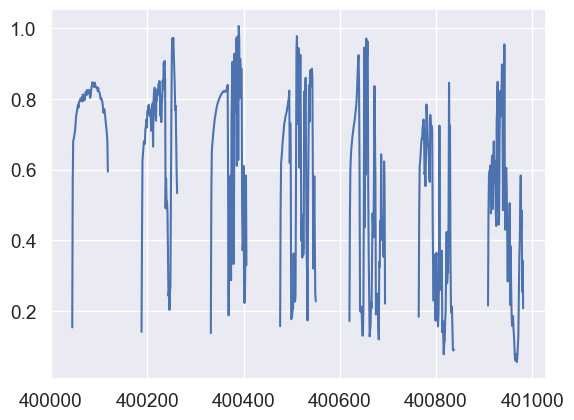

In [36]:
####################################################################################################################


plt.plot(kt[400_000:401_000])

Text(0.5, 1.0, 'Vall Perafita-Claror-Madriu')

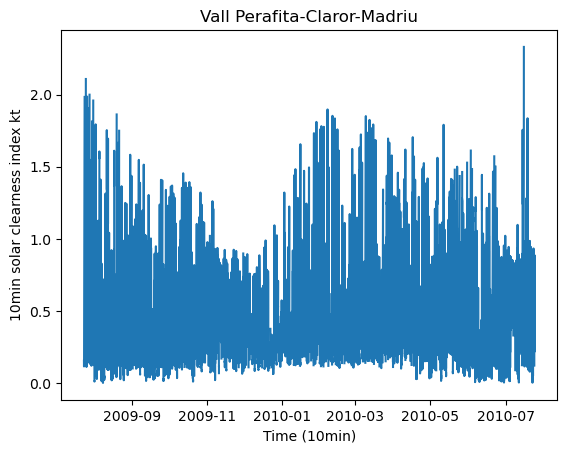

In [172]:
plt.plot(pd.to_datetime(df['TIMESTAMP'][29320:82000]),kt[29320:82000])
plt.xlabel('Time (10min)')
plt.ylabel('10min solar clearness index kt')
plt.title('Vall Perafita-Claror-Madriu')
#plt.savefig('10minclearness_index_postchange')


Text(0.5, 1.0, 'Vall Perafita-Claror-Madriu')

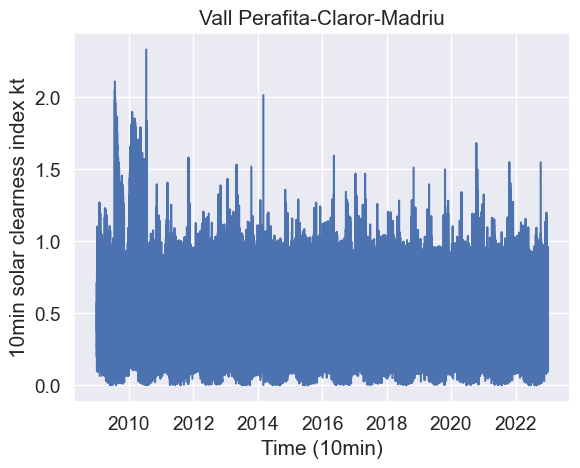

In [61]:
plt.plot(pd.to_datetime(df['TIMESTAMP']),kt)
plt.xlabel('Time (10min)')
plt.ylabel('10min solar clearness index kt')
plt.title('Vall Perafita-Claror-Madriu')

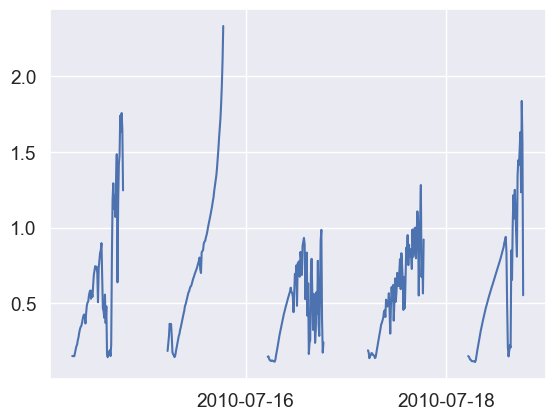

In [63]:
fig, ax = plt.subplots()

plt.plot(pd.to_datetime(df['TIMESTAMP'][80500:81200]),kt[80500:81200])
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

In [ ]:
#plt.plot(pd.to_datetime(df['TIMESTAMP'][80500:81200]),kt[80500:81200])

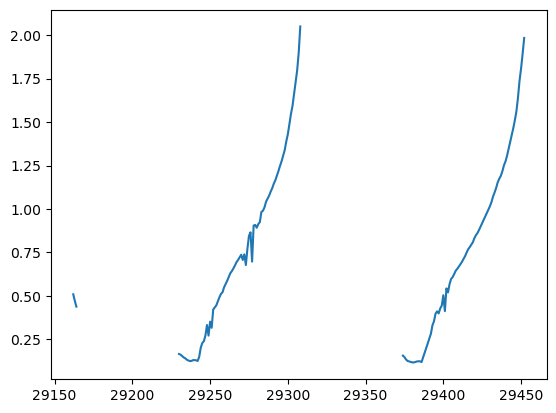

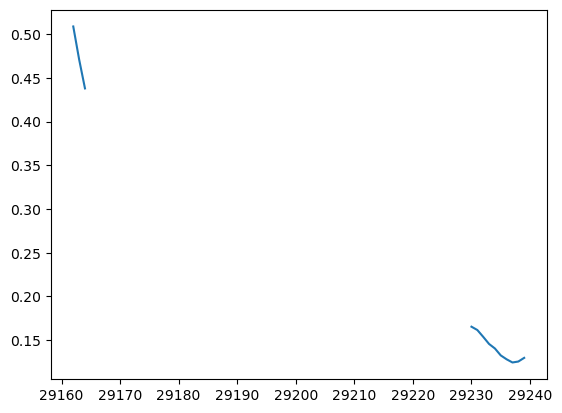

In [155]:
plt.plot(kt[29162:29500])
plt.show()

plt.plot(kt[29162:29240])
plt.show()

In [99]:
kt.mean()

0.5468946401974358

In [161]:
#Provam de fer un RS_Avg =np.nan per SZA >85

In [166]:
pd.read_csv('results_1.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_14016\1570415248.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('results_1.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day
0,2009-01-01 00:00:00,NaN,17.19,0.0,160.519214,0.000000,1.000000
1,2009-01-01 00:10:00,NaN,15.89,0.0,160.341724,0.166667,1.006944
2,2009-01-01 00:20:00,NaN,14.61,0.0,159.949193,0.333333,1.013889
3,2009-01-01 00:30:00,NaN,14.95,0.0,159.354097,0.500000,1.020833
4,2009-01-01 00:40:00,NaN,13.18,0.0,158.573632,0.666667,1.027778
...,...,...,...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,0.0,158.271643,23.166667,31.965278
730243,2022-12-31 23:20:00,0.0,51.99,0.0,159.116401,23.333333,31.972222
730244,2022-12-31 23:30:00,0.0,51.62,0.0,159.782794,23.500000,31.979167
730245,2022-12-31 23:40:00,0.0,48.46,0.0,160.252351,23.666667,31.986111


In [165]:
df = df.drop(columns= ['index'])
#columns=['column_nameA', 'column_nameB']

#df = df.drop('index', axis=1)
df.to_csv('results_1.csv', index=False)

In [173]:
df['zenith_angle_deg'][48]

85.2346765009949

# Gruix de Neu

In [29]:
file='PER10MIN2009_2022_GN.csv'
df2 = pd.read_csv(file, delimiter=";", decimal=",",parse_dates = ['TIMESTAMP'])
pd.read_csv(file, delimiter=";", decimal=",",parse_dates = ['TIMESTAMP'] )

,TIMESTAMP,Gruix_neu
0,2009-01-01 00:00:00,0.336
1,2009-01-01 00:10:00,0.332
2,2009-01-01 00:20:00,0.329
3,2009-01-01 00:30:00,0.327
4,2009-01-01 00:40:00,0.332
...,...,...
740813,2023-01-02 07:10:00,0.338
740814,2023-01-02 07:20:00,0.337
740815,2023-01-02 07:30:00,0.340
740816,2023-01-02 07:40:00,0.340


In [30]:
#df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP']).dt.strftime('%Y/%M/%D HH:MM:SS')
#df2.to_csv('GN_0.csv', index=False)

#FAIL!!!

In [31]:
neu = df2['Gruix_neu']
neu = np.array(neu)
type(neu[1])

numpy.float64

In [32]:
df2['TIMESTAMP'][3000]

Timestamp('2009-01-21 20:00:00')

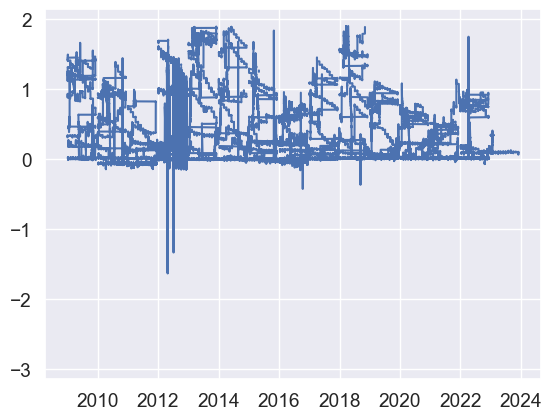

In [33]:
plt.plot(df2['TIMESTAMP'],neu)

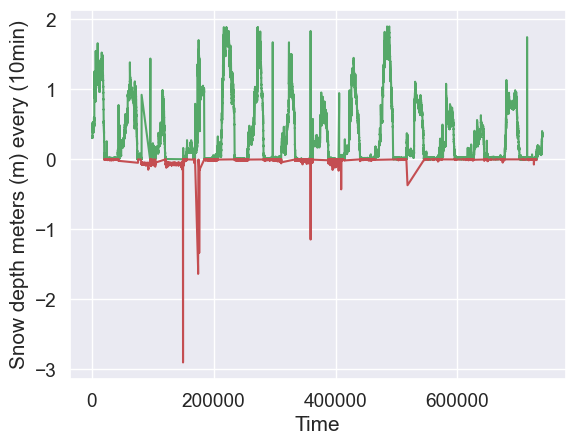

In [34]:
#plt.plot(neu)
fig, ax = plt.subplots()
num_dates = np.arange(len(neu))
x= num_dates
#x = pd.to_datetime(df2['TIMESTAMP'])
fx = neu
ax.plot(x[fx>=0], fx[fx>=0], 'g')
ax.plot(x[fx<0],  fx[fx<0],  'r')


plt.xlabel('Time')
plt.ylabel('Snow depth meters (m) every (10min)')
#plt.savefig('Snow_height')
plt.show()


C:\Users\T.C\AppData\Local\Temp\ipykernel_3244\342750291.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<AxesSubplot: >

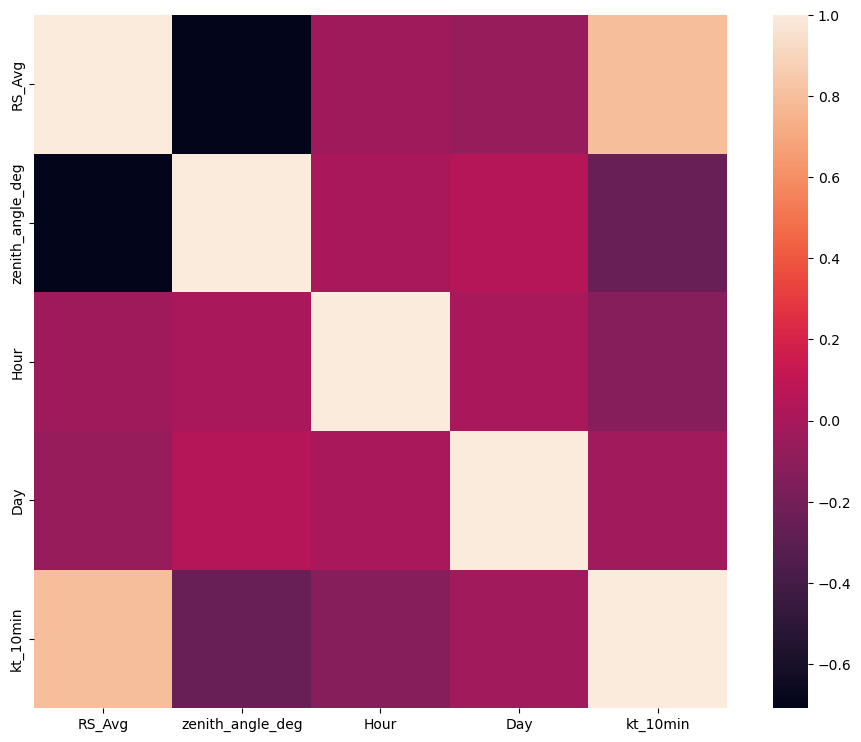

In [236]:
corrmat = df.corr()
f,ax = plt.subplots(figsize =(12,9))
sns.heatmap(corrmat, vmax = 1, square= True)

# No encaixa els pics de kt per sobre de 1 (de major freqüència) amb els pics de neu

# Cada any tenim aproximadament 1 metre 

# ERROR MOLT GRANS 2012 APROX (ALÇADA DE NEU NEGATIVA)


In [ ]:
# Idea fer un nou csv amb neu + errors(podriem considerar agafar zeros per zero
#i >0 i els valors pels negatius tant en els negatius,
#IMPLICA SUPOSAR QUE SI ÉS POSITIU NO HI HA ERROR LA QUAL COSA ÉS ERRÒNEA, APROX.)
#també i fer una correlation matrix pels errors i valors


In [ ]:
#NOu csv 

In [21]:
df2[df2['Gruix_neu']<0]= np.nan

Text(0, 0.5, 'Snow depth meters (m) every (10min)')

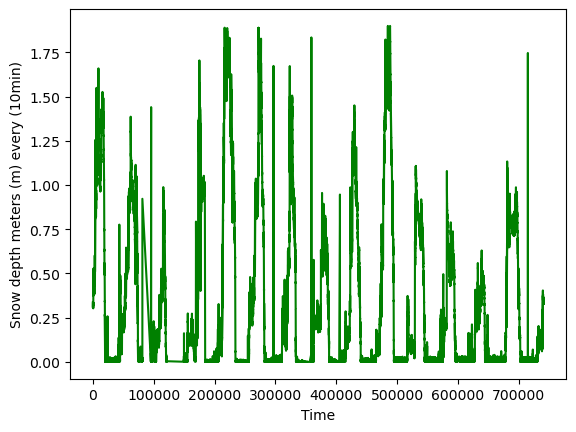

In [22]:
fig, ax = plt.subplots()
neu2 = df2['Gruix_neu']
num_dates = np.arange(len(neu2))
x= num_dates
#x = pd.to_datetime(df2['TIMESTAMP'])
fx = neu2
ax.plot(x[fx>=0], fx[fx>=0], 'g')
ax.plot(x[fx<0],  fx[fx<0],  'r')


plt.xlabel('Time')
plt.ylabel('Snow depth meters (m) every (10min)')

In [251]:
df['Gruix_Neu'] = neu2
df.to_csv('results_perfercorr.csv', index=False)

In [25]:
df3 = pd.read_csv('results_perfercorr.csv')
df3

C:\Users\T.C\AppData\Local\Temp\ipykernel_8884\4060805439.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('results_perfercorr.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min,Gruix_Neu
0,2009-01-01 00:00:00,NaN,17.19,NaN,160.519214,0.000000,1.000000,NaN,0.336
1,2009-01-01 00:10:00,NaN,15.89,NaN,160.341724,0.166667,1.006944,NaN,0.332
2,2009-01-01 00:20:00,NaN,14.61,NaN,159.949193,0.333333,1.013889,NaN,0.329
3,2009-01-01 00:30:00,NaN,14.95,NaN,159.354097,0.500000,1.020833,NaN,0.327
4,2009-01-01 00:40:00,NaN,13.18,NaN,158.573632,0.666667,1.027778,NaN,0.332
...,...,...,...,...,...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,NaN,158.271643,23.166667,365.965278,NaN,0.009
730243,2022-12-31 23:20:00,0.0,51.99,NaN,159.116401,23.333333,365.972222,NaN,0.008
730244,2022-12-31 23:30:00,0.0,51.62,NaN,159.782794,23.500000,365.979167,NaN,0.010
730245,2022-12-31 23:40:00,0.0,48.46,NaN,160.252351,23.666667,365.986111,NaN,0.006


C:\Users\T.C\AppData\Local\Temp\ipykernel_8884\1866250031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df3.corr()


<AxesSubplot: >

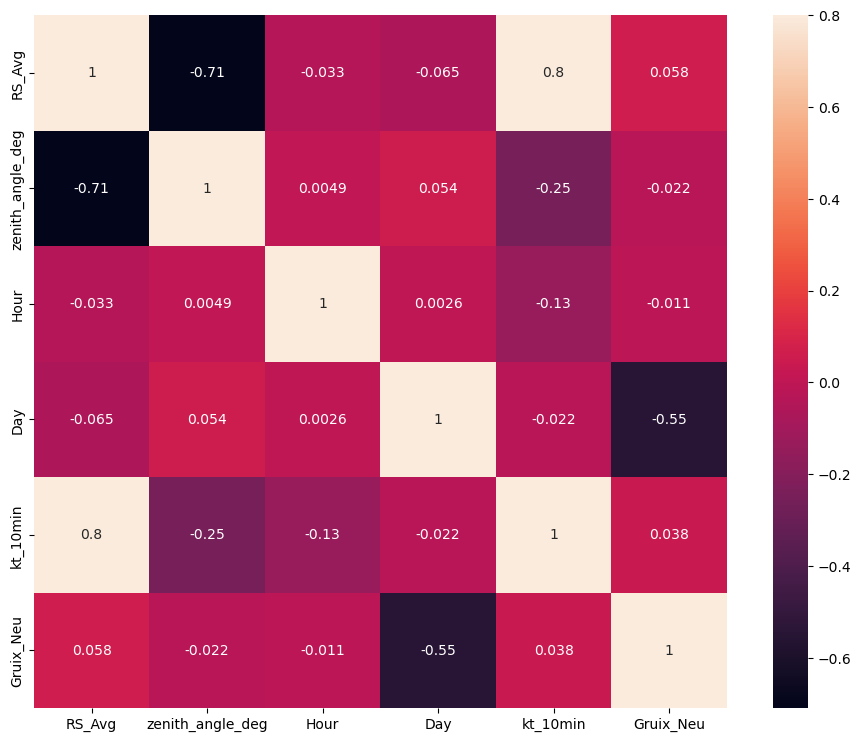

In [26]:
corrmat = df3.corr()
corrmat
f,ax = plt.subplots(figsize =(12,9))
sns.heatmap(corrmat, square = True,vmax = .8,annot_kws={'size': 10},annot = True)

C:\Users\T.C\AppData\Local\Temp\ipykernel_8884\1316360748.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df3.corr()


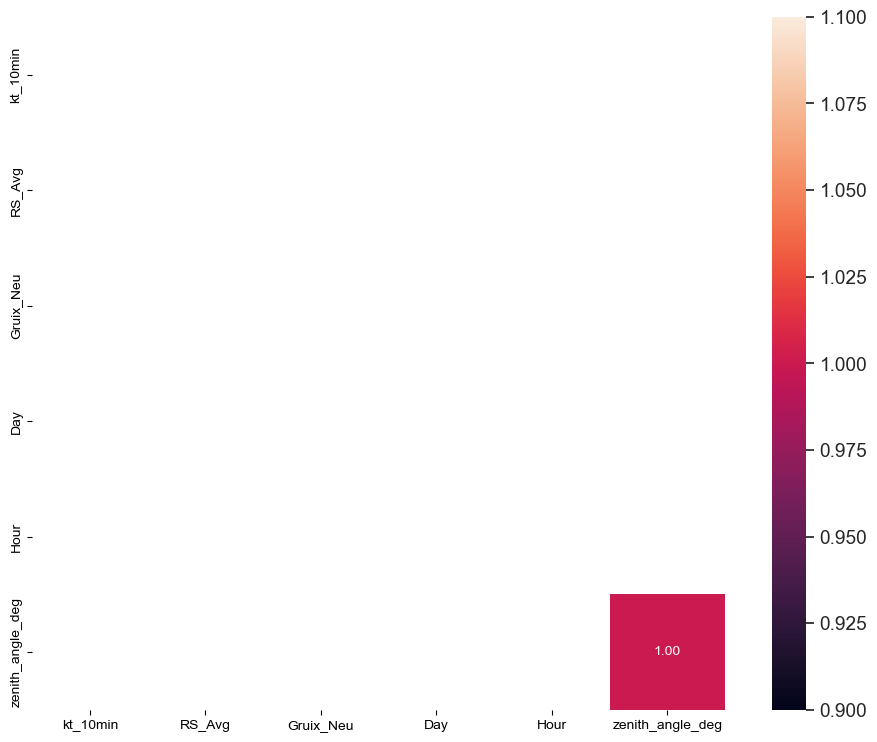

In [27]:
corrmat = df3.corr()
f,ax = plt.subplots(figsize =(12,9))
k=7
cols = corrmat.nlargest(k, 'kt_10min')['kt_10min'].index
cm = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# TALLAR A PARTIR DE 2011 ENRERE

In [ ]:
# GRAFICAR rs/ MODEL


# truncaR KT A LES 12:00


# 